# Data Wrangling Final Project
https://www.kaggle.com/datasets/hotsonhonet/amex-competition/versions/1?resource=download

We are working with the 2021 amex competition dataset.

We are trying to predict whether or not they will default on their credit card.

Also for reference, I'm using this template for this project. https://colab.research.google.com/drive/1agNKQQZL-zgGspPtBW5ZLiM8RHRmyJTH?usp=sharing

My Numbering does not match the final project module's numbering.

# (1.) Load Libraries and Dataset

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/michaelseman/mydatasets/main/amex.csv")

# (2.) Structural Investigation of data

In [ ]:
df.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [ ]:
# we can drop first two columns for sure. customer_id and name

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45528 entries, 0 to 45527
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              45528 non-null  object 
 1   name                     45528 non-null  object 
 2   age                      45528 non-null  int64  
 3   gender                   45528 non-null  object 
 4   owns_car                 44981 non-null  object 
 5   owns_house               45528 non-null  object 
 6   no_of_children           44754 non-null  float64
 7   net_yearly_income        45528 non-null  float64
 8   no_of_days_employed      45065 non-null  float64
 9   occupation_type          45528 non-null  object 
 10  total_family_members     45445 non-null  float64
 11  migrant_worker           45441 non-null  float64
 12  yearly_debt_payments     45433 non-null  float64
 13  credit_limit             45528 non-null  float64
 14  credit_limit_used(%)  

In [ ]:
# data types look ok.  definitely some nulls to deal with
# percent credit limit usage as an int is interesting

In [ ]:
df.nunique()

customer_id                45528
name                        4010
age                           33
gender                         3
owns_car                       2
owns_house                     2
no_of_children                10
net_yearly_income          45502
no_of_days_employed         7874
occupation_type               19
total_family_members          10
migrant_worker                 2
yearly_debt_payments       45251
credit_limit               45371
credit_limit_used(%)         100
credit_score                 450
prev_defaults                  3
default_in_last_6months        2
credit_card_default            2
dtype: int64

In [ ]:
# i was worried about occupation type, but only 19 values, doesnt seem too bad

In [ ]:
df.gender.value_counts()

F      29957
M      15570
XNA        1
Name: gender, dtype: int64

In [ ]:
df.shape

(45528, 19)

In [ ]:
df.corr()

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
age,1.000000,-0.009082,0.004079,0.000506,-0.010640,-0.005519,-0.002453,0.004473,-0.005529,0.000817,0.001393,-0.001406,-0.000983
no_of_children,-0.009082,1.000000,0.008939,-0.243088,0.880278,0.070673,0.028706,0.009354,0.007487,-0.014673,0.019528,0.021620,0.023689
net_yearly_income,0.004079,0.008939,1.000000,-0.029367,0.010432,0.001478,0.076958,0.993378,0.002696,-0.009688,-0.004696,0.015092,0.011508
no_of_days_employed,0.000506,-0.243088,-0.029367,1.000000,-0.229344,-0.219521,-0.104545,-0.027745,-0.018720,0.035533,-0.036232,-0.034295,-0.047043
total_family_members,-0.010640,0.880278,0.010432,-0.229344,1.000000,0.080634,0.078669,0.010251,0.001928,-0.011524,0.010608,0.013411,0.010754
migrant_worker,-0.005519,0.070673,0.001478,-0.219521,0.080634,1.000000,0.014170,-0.000110,0.010198,-0.013319,0.029202,0.029964,0.034013
yearly_debt_payments,-0.002453,0.028706,0.076958,-0.104545,0.078669,0.014170,1.000000,0.075169,-0.006850,0.005756,-0.012738,-0.011619,-0.013089
credit_limit,0.004473,0.009354,0.993378,-0.027745,0.010251,-0.000110,0.075169,1.000000,0.003109,-0.009685,-0.004302,0.015759,0.012250
credit_limit_used(%),-0.005529,0.007487,0.002696,-0.018720,0.001928,0.010198,-0.006850,0.003109,1.000000,-0.174420,0.252505,0.253684,0.326641
credit_score,0.000817,-0.014673,-0.009688,0.035533,-0.011524,-0.013319,0.005756,-0.009685,-0.174420,1.000000,-0.471421,-0.450712,-0.543164


## Thoughts: correlation

In [ ]:
# there is a really high and expected correlation between default in last 6 months and prev_defaults
# these also have the higest correlation with our outcome variable
# total family members and number of children very highly correlated... more or less measuring the same thing.... we should probably eliminate 1
# credit limit and annual income almost a 1 to 1 correlation, we will have to eliminate 1 for sure

In [ ]:
df.describe()

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
count,45528.000000,44754.000000,4.552800e+04,45065.000000,45445.000000,45441.000000,45433.000000,4.552800e+04,45528.00000,45520.000000,45528.000000,45528.000000,45528.000000
mean,38.993411,0.420655,2.006556e+05,67609.289293,2.158081,0.179111,31796.965311,4.354842e+04,52.23502,782.791257,0.060710,0.050540,0.081203
std,9.543990,0.724097,6.690740e+05,139323.524434,0.911572,0.383450,17269.727234,1.487847e+05,29.37691,100.619746,0.264629,0.219059,0.273149
min,23.000000,0.000000,2.717061e+04,2.000000,1.000000,0.000000,2237.470000,4.003140e+03,0.00000,500.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,1.263458e+05,936.000000,2.000000,0.000000,19231.140000,2.397381e+04,27.00000,704.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,1.717149e+05,2224.000000,2.000000,0.000000,29081.650000,3.568804e+04,54.00000,786.000000,0.000000,0.000000,0.000000
75%,47.000000,1.000000,2.406038e+05,5817.000000,3.000000,0.000000,40561.150000,5.343576e+04,78.00000,867.000000,0.000000,0.000000,0.000000
max,55.000000,9.000000,1.407590e+08,365252.000000,10.000000,1.000000,328112.860000,3.112997e+07,99.00000,949.000000,2.000000,1.000000,1.000000


In [ ]:
# look at the max value for number of days worked... we have some outliers to treat later
365252/365

1000.6904109589041

## checking datatypes

In [ ]:
df.dtypes

customer_id                 object
name                        object
age                          int64
gender                      object
owns_car                    object
owns_house                  object
no_of_children             float64
net_yearly_income          float64
no_of_days_employed        float64
occupation_type             object
total_family_members       float64
migrant_worker             float64
yearly_debt_payments       float64
credit_limit               float64
credit_limit_used(%)         int64
credit_score               float64
prev_defaults                int64
default_in_last_6months      int64
credit_card_default          int64
dtype: object

In [ ]:
# [no_of_children, no_of_days_employed, total_family_members] should be int64 not float
# migrant_worker could be a category
# we need to take care of nulls first before converting datatypes

## checking for nulls

In [ ]:
# Check for nulls --- you do NOT want nulls when you train
df.isnull().sum()

customer_id                  0
name                         0
age                          0
gender                       0
owns_car                   547
owns_house                   0
no_of_children             774
net_yearly_income            0
no_of_days_employed        463
occupation_type              0
total_family_members        83
migrant_worker              87
yearly_debt_payments        95
credit_limit                 0
credit_limit_used(%)         0
credit_score                 8
prev_defaults                0
default_in_last_6months      0
credit_card_default          0
dtype: int64

### dropping customer_id, name

In [ ]:
df.drop(['customer_id','name'], axis=1,inplace=True)

## checking distribution of target variable

In [ ]:
df.credit_card_default.value_counts(normalize=True)

0    0.918797
1    0.081203
Name: credit_card_default, dtype: float64

## Splitting data into numeric and categorical

In [ ]:
# Split the data into numeric and categorical lists and dataframes
numerics = ['int16','int32','int64','float64']
catDF = df.select_dtypes(exclude=numerics)
numDF = df.select_dtypes(include=numerics)
catDF.head()


,gender,owns_car,owns_house,occupation_type
0,F,N,Y,Unknown
1,M,N,Y,Laborers
2,M,N,Y,Laborers
3,F,N,Y,Core staff
4,M,Y,Y,Core staff


In [ ]:
numDF.head()

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,46,0.0,107934.04,612.0,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,29,0.0,109862.62,2771.0,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,37,0.0,230153.17,204.0,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,39,0.0,122325.82,11941.0,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,46,0.0,387286.00,1459.0,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


# splitting X and y

In [ ]:
# This is how you merge the datasets back together:
# Merge back into a single df
# preparing the X Variables  (Don't forget ot remove the target!!)
X = pd.concat([catDF,numDF],axis=1)
print(X.shape)

# This is how you extract the target variable
y = X['credit_card_default']
X.drop(['credit_card_default'],axis=1,inplace=True)
print(df.shape)
print(X.shape)
print(y.shape)

(45528, 17)
(45528, 17)
(45528, 16)
(45528,)


In [ ]:
# dropping target from numDF
numDF.drop(['credit_card_default'],axis=1,inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
numDF.head()

,age,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
0,46,0.0,107934.04,612.0,1.0,1.0,33070.28,18690.93,73,544.0,2,1
1,29,0.0,109862.62,2771.0,2.0,0.0,15329.53,37745.19,52,857.0,0,0
2,37,0.0,230153.17,204.0,2.0,0.0,48416.60,41598.36,43,650.0,0,0
3,39,0.0,122325.82,11941.0,2.0,0.0,22574.36,32627.76,20,754.0,0,0
4,46,0.0,387286.00,1459.0,1.0,0.0,38282.95,52950.64,75,927.0,0,0


# Creating a baseline model
So we are going to run our DF through a model, having only eliminated the name and customerid columns

we are going to put 0 in place of all the nulls

In [ ]:
# Split the data into test, train, validation sets... 80/20
from sklearn.model_selection import train_test_split
# This gives the 80/20 train test split
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=11, stratify=df.credit_card_default)

len(df_train_full), len(df_test)
# Replace nulls with 0's - these are pandas dataframes
df_train_full = df_train_full.fillna(0)

df_test = df_test.fillna(0)
len(df_train_full),len(df_test)

(36422, 9106)

In [ ]:
df_train_full.credit_card_default.value_counts(normalize=True)

0    0.918785
1    0.081215
Name: credit_card_default, dtype: float64

In [ ]:
#Split the y out into train/test/splits... these are numpy ndarrays ... msrp is your target variables
# Replace with your target variable!!!  
y_train = (df_train_full.credit_card_default).values
y_test = (df_test.credit_card_default).values
del df_train_full['credit_card_default']
del df_test['credit_card_default']

In [ ]:
len(y_train),len(y_test)

(36422, 9106)

In [ ]:
# Encode the data
# Convert these data frames into a LIST of DICTIONARIES (each element in the list is a dictionary (the record))
dict_train = df_train_full.to_dict(orient='records')
dict_test = df_test.to_dict(orient='records')

In [ ]:
dict_test[1]

{'age': 43,
 'gender': 'F',
 'owns_car': 'N',
 'owns_house': 'Y',
 'no_of_children': 0.0,
 'net_yearly_income': 205637.55,
 'no_of_days_employed': 2415.0,
 'occupation_type': 'Sales staff',
 'total_family_members': 2.0,
 'migrant_worker': 0.0,
 'yearly_debt_payments': 19088.3,
 'credit_limit': 34804.51,
 'credit_limit_used(%)': 71,
 'credit_score': 777.0,
 'prev_defaults': 0,
 'default_in_last_6months': 0}

In [ ]:
# Convert the LIST OF DICTIONARIES into a Feature Matrix (does all of the encoding)
from sklearn.feature_extraction import DictVectorizer
 
dv = DictVectorizer(sparse=False)
 
X_train = dv.fit_transform(dict_train)
X_test = dv.transform(dict_test)
features = dv.get_feature_names_out()

In [ ]:
features

array(['age', 'credit_limit', 'credit_limit_used(%)', 'credit_score',
       'default_in_last_6months', 'gender=F', 'gender=M', 'gender=XNA',
       'migrant_worker', 'net_yearly_income', 'no_of_children',
       'no_of_days_employed', 'occupation_type=Accountants',
       'occupation_type=Cleaning staff', 'occupation_type=Cooking staff',
       'occupation_type=Core staff', 'occupation_type=Drivers',
       'occupation_type=HR staff',
       'occupation_type=High skill tech staff',
       'occupation_type=IT staff', 'occupation_type=Laborers',
       'occupation_type=Low-skill Laborers', 'occupation_type=Managers',
       'occupation_type=Medicine staff',
       'occupation_type=Private service staff',
       'occupation_type=Realty agents', 'occupation_type=Sales staff',
       'occupation_type=Secretaries', 'occupation_type=Security staff',
       'occupation_type=Unknown', 'occupation_type=Waiters/barmen staff',
       'owns_car', 'owns_car=N', 'owns_car=Y', 'owns_house=N',
       

In [ ]:
X_train.shape

(36422, 39)

## Harness

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LR: 0.954039 (0.009036)
Score for each of the 10 K-fold tests:  [0.95745265 0.95470766 0.95744097 0.92751236 0.95634267 0.95799012
 0.95606809 0.95414607 0.95744097 0.96128501]
LogisticRegression(solver='liblinear')
	Training time: 1.033s
	Prediction time: 10.517s

LDA: 0.976498 (0.002350)
Score for each of the 10 K-fold tests:  [0.97529509 0.97996157 0.97583745 0.9763866  0.97309171 0.97473915
 0.97473915 0.9752883  0.97968149 0.97995607]
LinearDiscriminantAnalysis()
	Training time: 0.311s
	Prediction time: 3.400s

KNN: 0.913761 (0.002460)
Score for each of the 10 K-fold tests:  [0.91270931 0.91737579 0.91433278 0.91378364 0.91350906 0.90939044
 0.91295991 0.91048874 0.91680395 0.91625481]
KNeighborsClassifier()
	Training time: 0.005s
	Prediction time: 38.493s

CART: 0.973670 (0.002226)
Score for each of the 10 K-fold tests:  [0.97337359 0.97639308 0.97583745 0.97171884 0.97007139 0.97089511
 0.97419001 0.97364086 0.97336628 0.97721032]
DecisionTreeClassifier()
	Training time: 0.123s


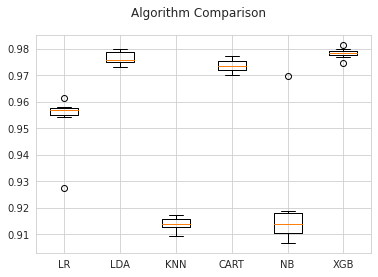

In [ ]:
# Compare Algorithms
from sklearn.metrics import roc_auc_score
from time import time
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('XGB', XGBClassifier()))
# models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    start = time()
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    model.fit(X_train, y_train)
    train_time = time() - start
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    predict_time = time()-start 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    #y_pred = model.predict_proba(X_train)[:, 1]
    #auc = roc_auc_score(y_train, y_pred)
    print(msg)
    print("Score for each of the 10 K-fold tests: ",cv_results)
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    #y_pred = model.predict(X_test)
    #print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print()
    
    
    
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
# SVC was taking an absurdly long time, so we left it out

## lets look deeper into the LDA model
this is one of our best performing models, so this will be our baseline


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[8367,    0],
       [ 226,  513]])

In [ ]:
from sklearn.metrics import classification_report
print (classification_report (y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      8367
           1       1.00      0.69      0.82       739

    accuracy                           0.98      9106
   macro avg       0.99      0.85      0.90      9106
weighted avg       0.98      0.98      0.97      9106



### Thoughts: baseline model
- So we were able to get around 98% accuracy
- The dataset is heavily weight, with around 91% of rows not defaulting
- So we did better than just predicting NO default for every outcome
- the 69% recall score is the one we want to improve, we want to be able to indentify those who will default.

# (3.)  Qualitative Investigation of the Data

## Duplicates

In [ ]:
# Duplicates in the Columns?
df.duplicated()
df.duplicated().sum()

0

In [ ]:
# Duplicated Rows?
df[df.duplicated()]

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default


## Missing Values per Sample

Text(114.0, 0.5, 'Sample Number')

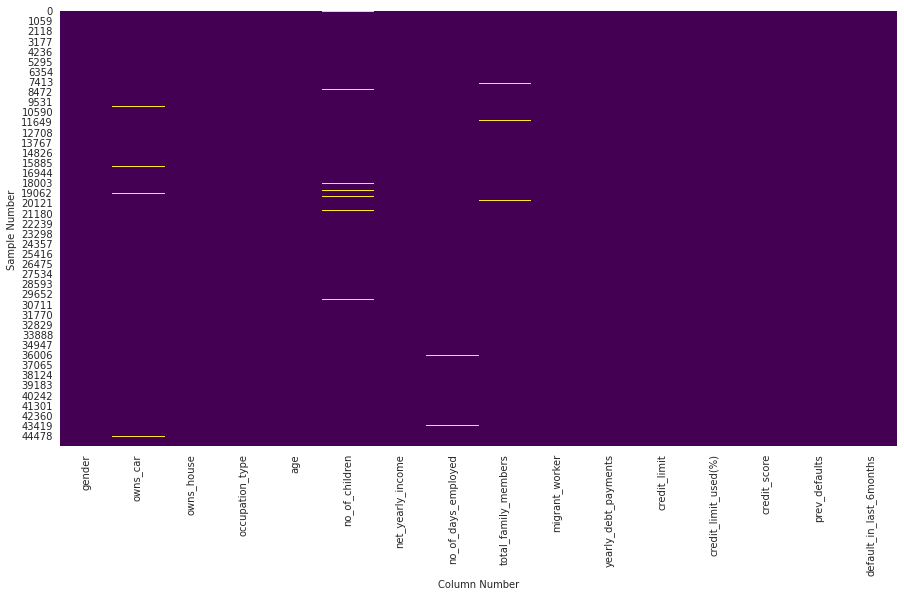

In [ ]:
# b) Missing Values per Sample (Big Holes)


plt.figure(figsize=(15, 8))
sns.set_style('whitegrid')

g = sns.heatmap(X.isnull(), cbar=False, cmap='viridis')

g.set_xlabel('Column Number')
g.set_ylabel('Sample Number')

In [ ]:
X.isna().sum()

gender                       0
owns_car                   547
owns_house                   0
occupation_type              0
age                          0
no_of_children             774
net_yearly_income            0
no_of_days_employed        463
total_family_members        83
migrant_worker              87
yearly_debt_payments        95
credit_limit                 0
credit_limit_used(%)         0
credit_score                 8
prev_defaults                0
default_in_last_6months      0
dtype: int64

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


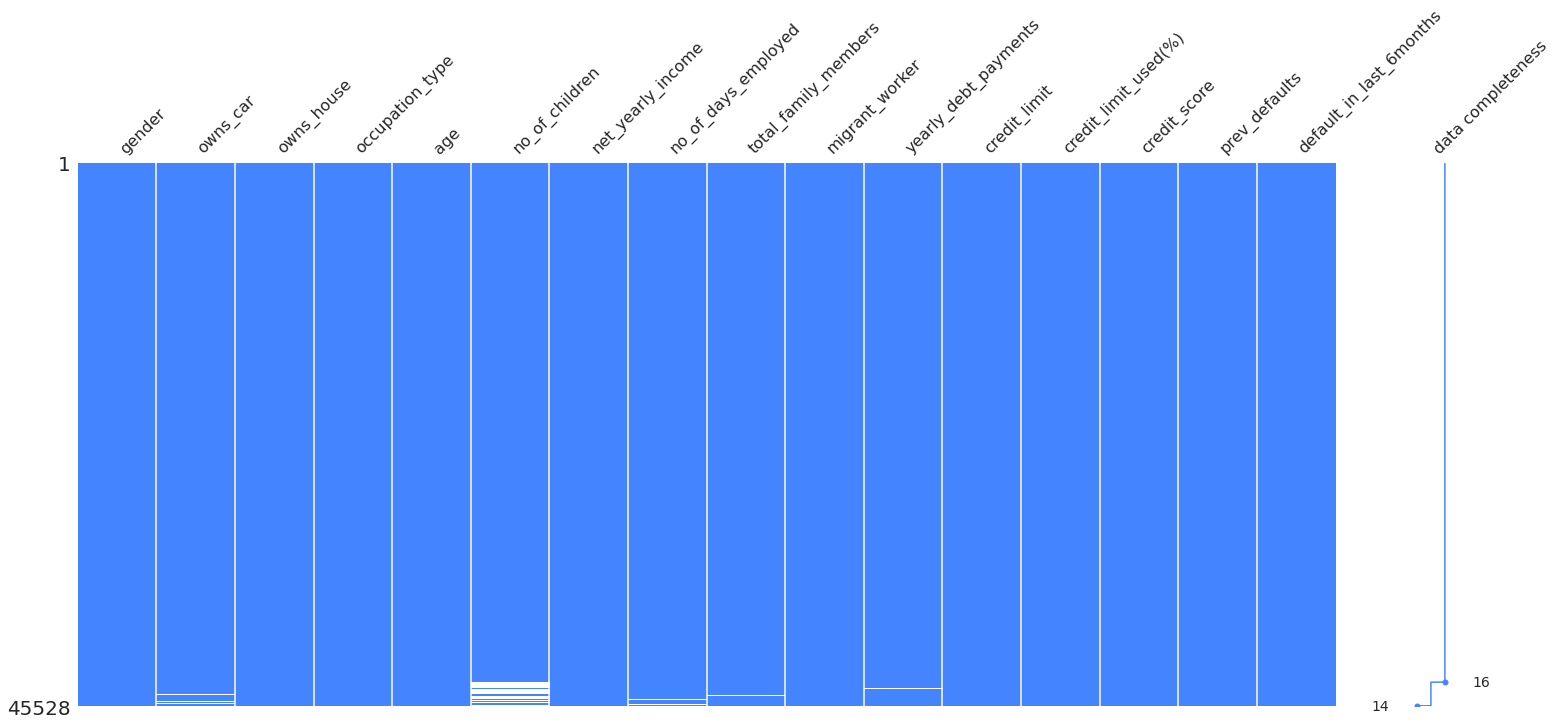

In [ ]:
!pip install missingno
import missingno as msno
msno.matrix(X, labels=True, sort='descending', color=(0.27, 0.52, 1.0));

In [ ]:
X.shape

(45528, 16)

In [ ]:
# Drop rows that are 20% or more empty (you set the threshold)
X = X.dropna(thresh=X.shape[1] * 0.80, axis=0).reset_index(drop=True)
X.shape

(45528, 16)

## Missing Values per Feature

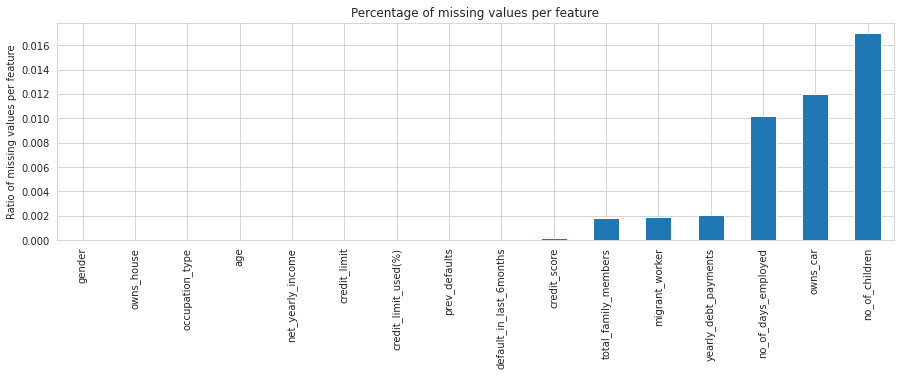

In [ ]:
# c) Missing Values per Feature (Big Holes)
X.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",

    ylabel="Ratio of missing values per feature");

In [ ]:
X.shape

(45528, 16)

### dropping number_of_children

In [ ]:
# as we noted before, no of children and total family members are highly correlated... given the amount of nulls for number of children, lets drop this column
# dropping columns missing 15% of their data (nulls)
X = X.dropna(thresh=X.shape[0] * 0.985, axis=1)
X.shape

(45528, 15)

## Impute Values
This will fill all the small holes / nulls with the mean

In [ ]:
X.isna().sum()

gender                       0
owns_car                   547
owns_house                   0
occupation_type              0
age                          0
net_yearly_income            0
no_of_days_employed        463
total_family_members        83
migrant_worker              87
yearly_debt_payments        95
credit_limit                 0
credit_limit_used(%)         0
credit_score                 8
prev_defaults                0
default_in_last_6months      0
dtype: int64

In [ ]:
column_list_num=['no_of_days_employed','total_family_members','yearly_debt_payments', 'credit_score']
column_list_cat=['owns_car','migrant_worker']

In [ ]:
# imputing mean for numeric
for column in column_list_num:
  X[column] = X[column].fillna(X[column].mean())

<ipython-input-133-01b65f11c156>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = X[column].fillna(X[column].mean())


In [ ]:
# imputing mode for categorical
for column in column_list_cat:
  X[column] = X[column].fillna(X[column].mode().iloc[0])

<ipython-input-134-f80bde7129b7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = X[column].fillna(X[column].mode().iloc[0])


In [ ]:
X.isna().sum()

gender                     0
owns_car                   0
owns_house                 0
occupation_type            0
age                        0
net_yearly_income          0
no_of_days_employed        0
total_family_members       0
migrant_worker             0
yearly_debt_payments       0
credit_limit               0
credit_limit_used(%)       0
credit_score               0
prev_defaults              0
default_in_last_6months    0
dtype: int64

### converting datatypes

In [ ]:
# convert columns to int

X["no_of_days_employed"] = X["no_of_days_employed"].astype(int)
X["total_family_members"] = X["total_family_members"].astype(int)
X["migrant_worker"] = X["migrant_worker"].astype(int)

In [ ]:
X.dtypes

gender                      object
owns_car                    object
owns_house                  object
occupation_type             object
age                          int64
net_yearly_income          float64
no_of_days_employed          int64
total_family_members         int64
migrant_worker               int64
yearly_debt_payments       float64
credit_limit               float64
credit_limit_used(%)         int64
credit_score               float64
prev_defaults                int64
default_in_last_6months      int64
dtype: object

## Plotting all Numeric Features

In [ ]:
# Split the data into numeric and categorical lists and dataframes
numerics = ['int16','int32','int64','float64']
catDF = X.select_dtypes(exclude=numerics)
numDF = X.select_dtypes(include=numerics)
catDF.head()

,gender,owns_car,owns_house,occupation_type
0,F,N,Y,Unknown
1,M,N,Y,Laborers
2,M,N,Y,Laborers
3,F,N,Y,Core staff
4,M,Y,Y,Core staff


In [ ]:
numDF.head()

,age,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
0,46,107934.04,612,1,1,33070.28,18690.93,73,544.0,2,1
1,29,109862.62,2771,2,0,15329.53,37745.19,52,857.0,0,0
2,37,230153.17,204,2,0,48416.60,41598.36,43,650.0,0,0
3,39,122325.82,11941,2,0,22574.36,32627.76,20,754.0,0,0
4,46,387286.00,1459,1,0,38282.95,52950.64,75,927.0,0,0


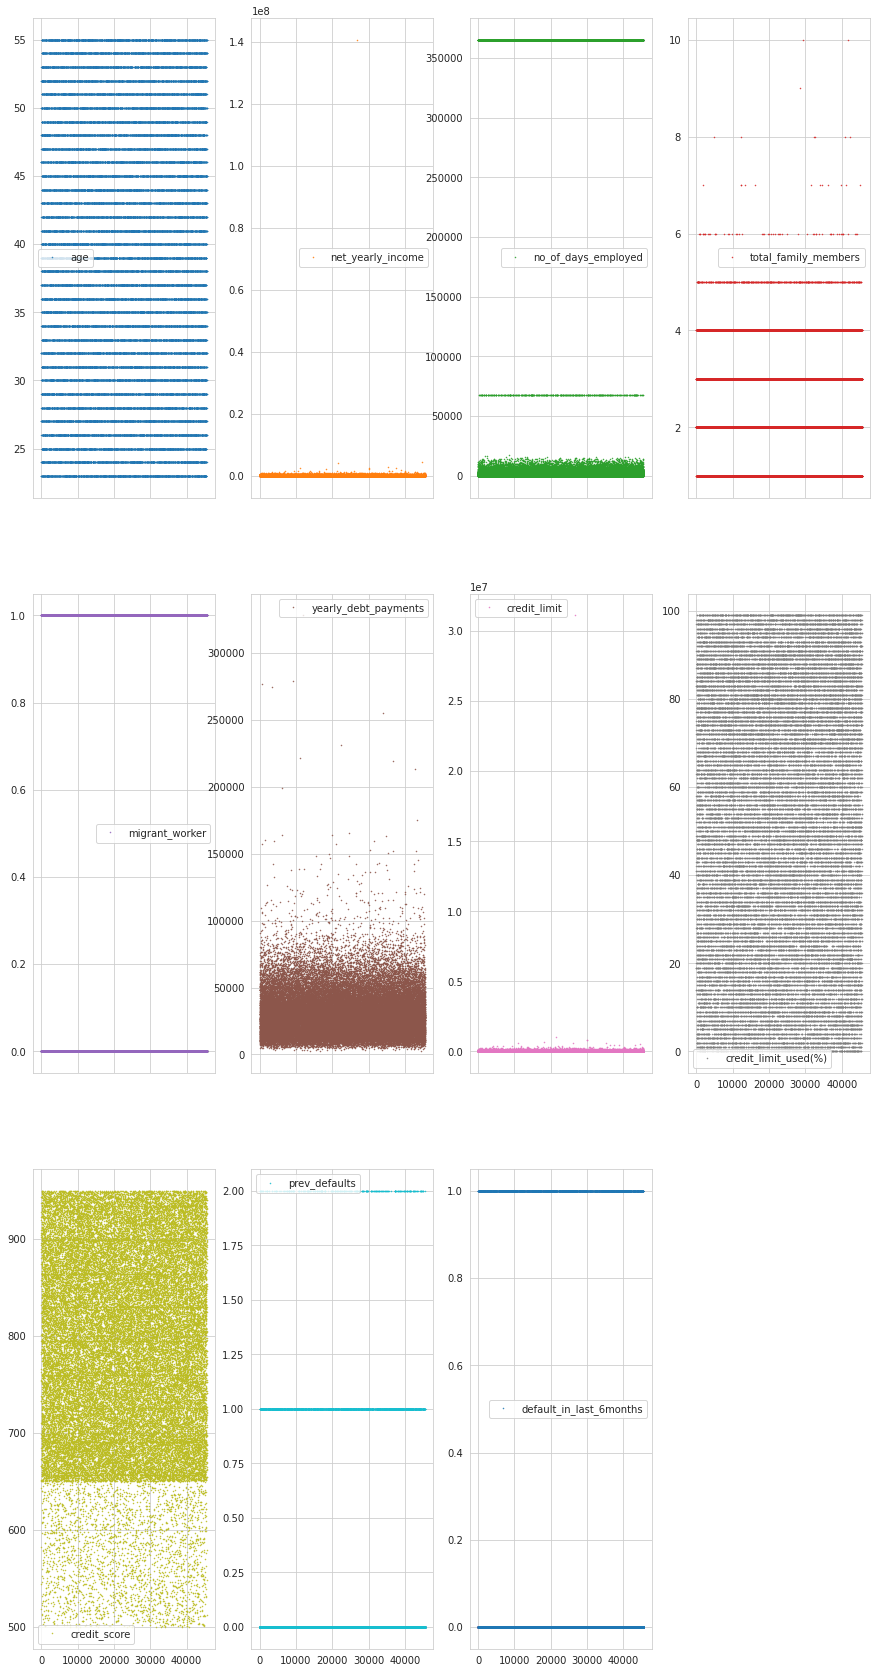

In [ ]:
# Plot all numeric features:
numDF.plot(lw=0, marker=".", subplots=True, layout=(-1, 4), # -1 means use as many as possible
          figsize=(15, 30), markersize=1);

In [ ]:
numDF.describe()

,age,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
count,45528.000000,4.552800e+04,45528.000000,45528.000000,45528.000000,45528.000000,4.552800e+04,45528.00000,45528.000000,45528.000000,45528.000000
mean,38.993411,2.006556e+05,67609.286351,2.157793,0.178769,31796.965311,4.354842e+04,52.23502,782.791257,0.060710,0.050540
std,9.543990,6.690740e+05,138613.268584,0.910766,0.383163,17251.699681,1.487847e+05,29.37691,100.610905,0.264629,0.219059
min,23.000000,2.717061e+04,2.000000,1.000000,0.000000,2237.470000,4.003140e+03,0.00000,500.000000,0.000000,0.000000
25%,31.000000,1.263458e+05,946.750000,2.000000,0.000000,19240.262500,2.397381e+04,27.00000,704.000000,0.000000,0.000000
50%,39.000000,1.717149e+05,2261.000000,2.000000,0.000000,29122.265000,3.568804e+04,54.00000,786.000000,0.000000,0.000000
75%,47.000000,2.406038e+05,6206.000000,3.000000,0.000000,40535.472500,5.343576e+04,78.00000,867.000000,0.000000,0.000000
max,55.000000,1.407590e+08,365252.000000,10.000000,1.000000,328112.860000,3.112997e+07,99.00000,949.000000,2.000000,1.000000


## Plotting Categorical Features

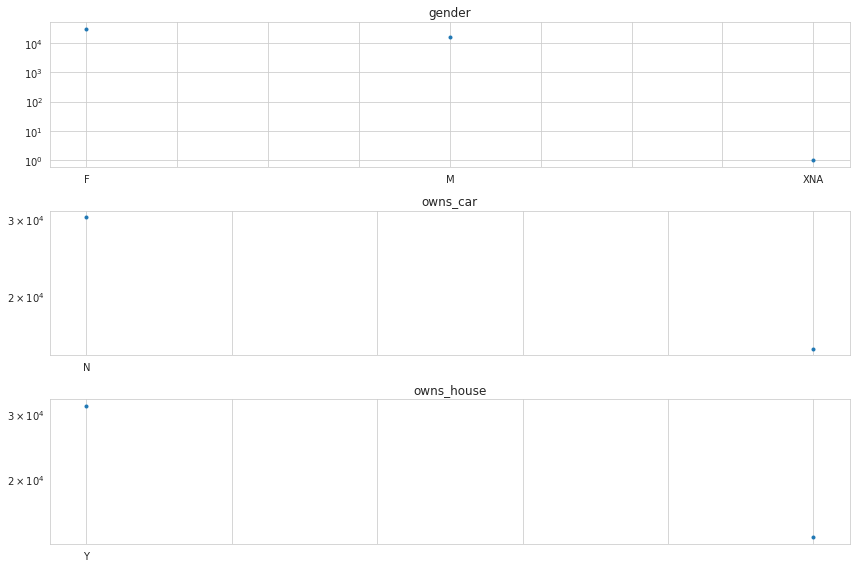

In [ ]:
# Create figure object with 3 subplots
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(12, 8))


# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(catDF.columns, axes.ravel()):

    # Selects one single feature and counts number of occurrences per unique value
    catDF[col].value_counts().plot(

        # Plots this information in a figure with log-scaled y-axis
        logy=True, title=col, lw=0, marker=".", ax=ax)
    
plt.tight_layout();

In [ ]:
# I wonder if we need to do something about that 1 random row, that has gender as XNA

## Pandas Profiling

In [ ]:
!pip install pandas-profiling==3.2.0
!pip install markupsafe==2.0.1
# https://pypi.org/project/pandas-profiling/3.1.0/#history

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.6/262.6 KB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 KB 24.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 KB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 59.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 KB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 14.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=39dff6589eca344b7d1dad2c2a42079faa8eb9ede037504590f4f7fc94279449
  Stored in directory: /root/.cache/pip/wheels/23/14/6e/4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
Successfully built htmlmin
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.2
    Uninstalling MarkupSafe-2.1.2:
      Successfully uninstalled MarkupSafe-2.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
werkzeug 2.2.3 requires MarkupSafe>=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.


In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport

In [ ]:
report = ProfileReport(df)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

ImportError: ignored

### Thoughts:
- So we dropped number_of_children as it had the most missing values and was highly correlated with family size.
- we also imputed the mean to eliminate all nulls.  This was an easy decision as this dataset had very few nulls to begin with

# (4.) Content Investigation of the Data

## Feature Distribution

CPU times: user 2 s, sys: 140 ms, total: 2.14 s
Wall time: 3.4 s


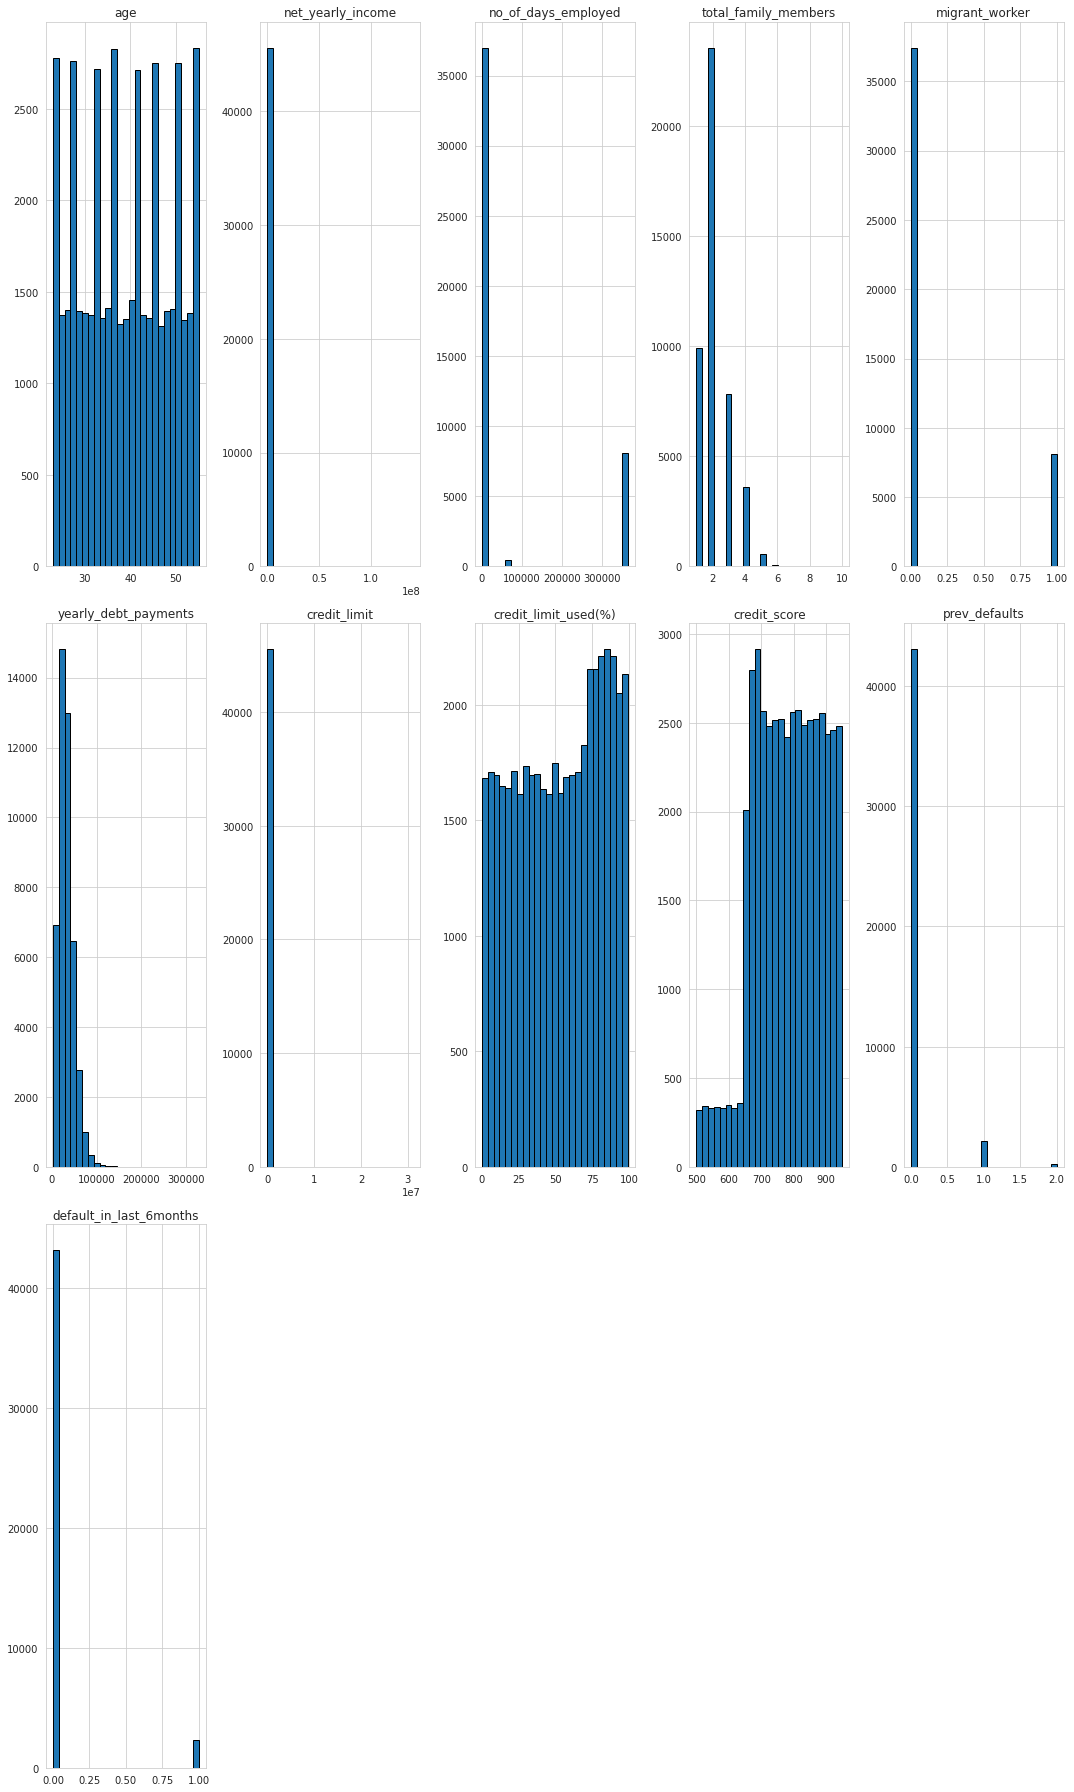

In [ ]:
# Feature Distribution
%%time
# Plots the histogram for each numerical feature in a separate subplot
numDF.hist(bins=25, figsize=(15, 25), layout=(-1, 5),
edgecolor="black")
plt.tight_layout();

<ipython-input-148-f041e978af78>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_freq = (X == most_frequent_entry.squeeze()).mean().sort_values(ascending=False)


owns_house         0.695001
owns_car           0.665305
gender             0.657991
occupation_type    0.314070
age                0.000000
dtype: float64

<AxesSubplot:>

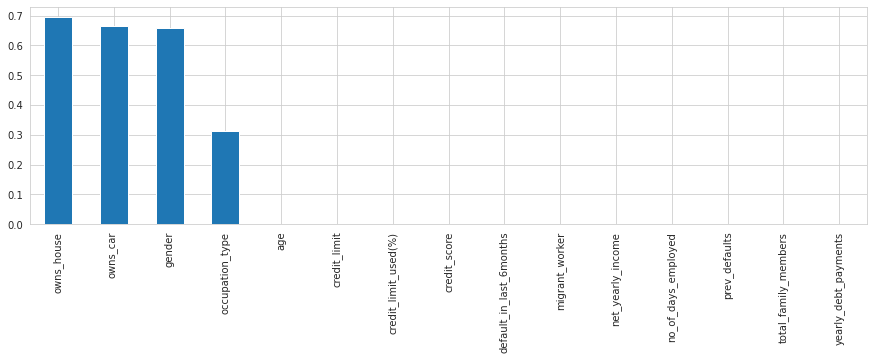

In [ ]:
# Collects for each categorical feature the most frequent entry
most_frequent_entry = X.select_dtypes(include='object').mode()
# Computes the ratio of singular value content for each feature
df_freq = (X == most_frequent_entry.squeeze()).mean().sort_values(ascending=False)
# Show the top 5 features with the highest ratio of singular value content
display(df_freq.head())
# Visualize the 'df_freq' table
df_freq.plot.bar(figsize=(15, 4))


## Feature Relationship

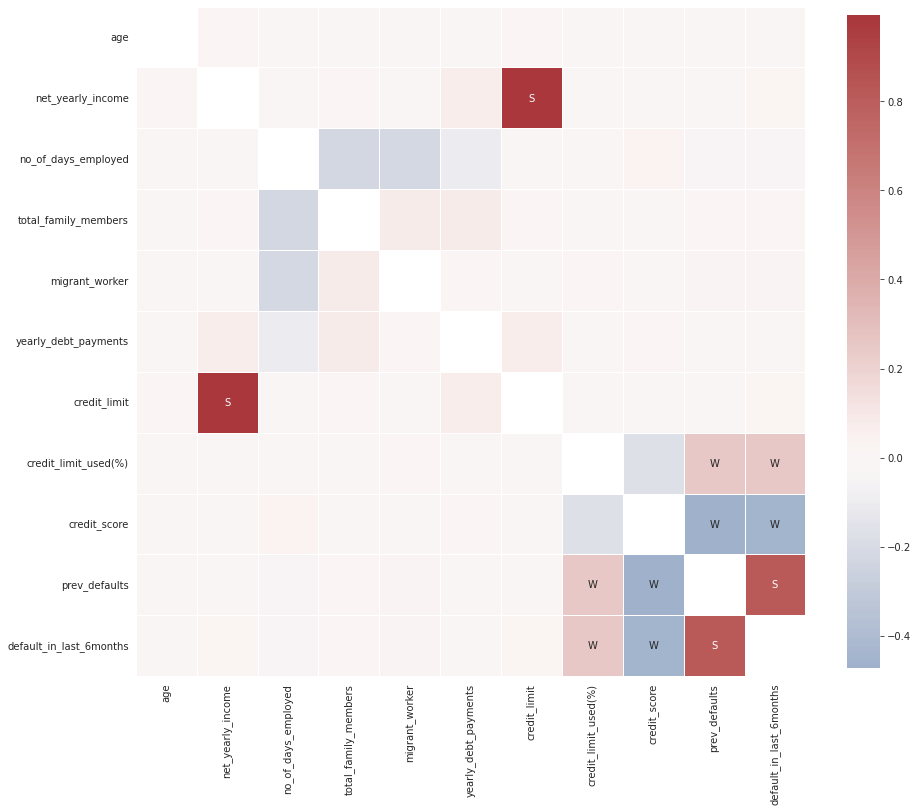

In [ ]:
# Feature Relationships
# Evaluate but remember to consider multicollinearity

# Computes feature correlation
df_corr = X.corr(method="pearson")

# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

## Feature Patterns

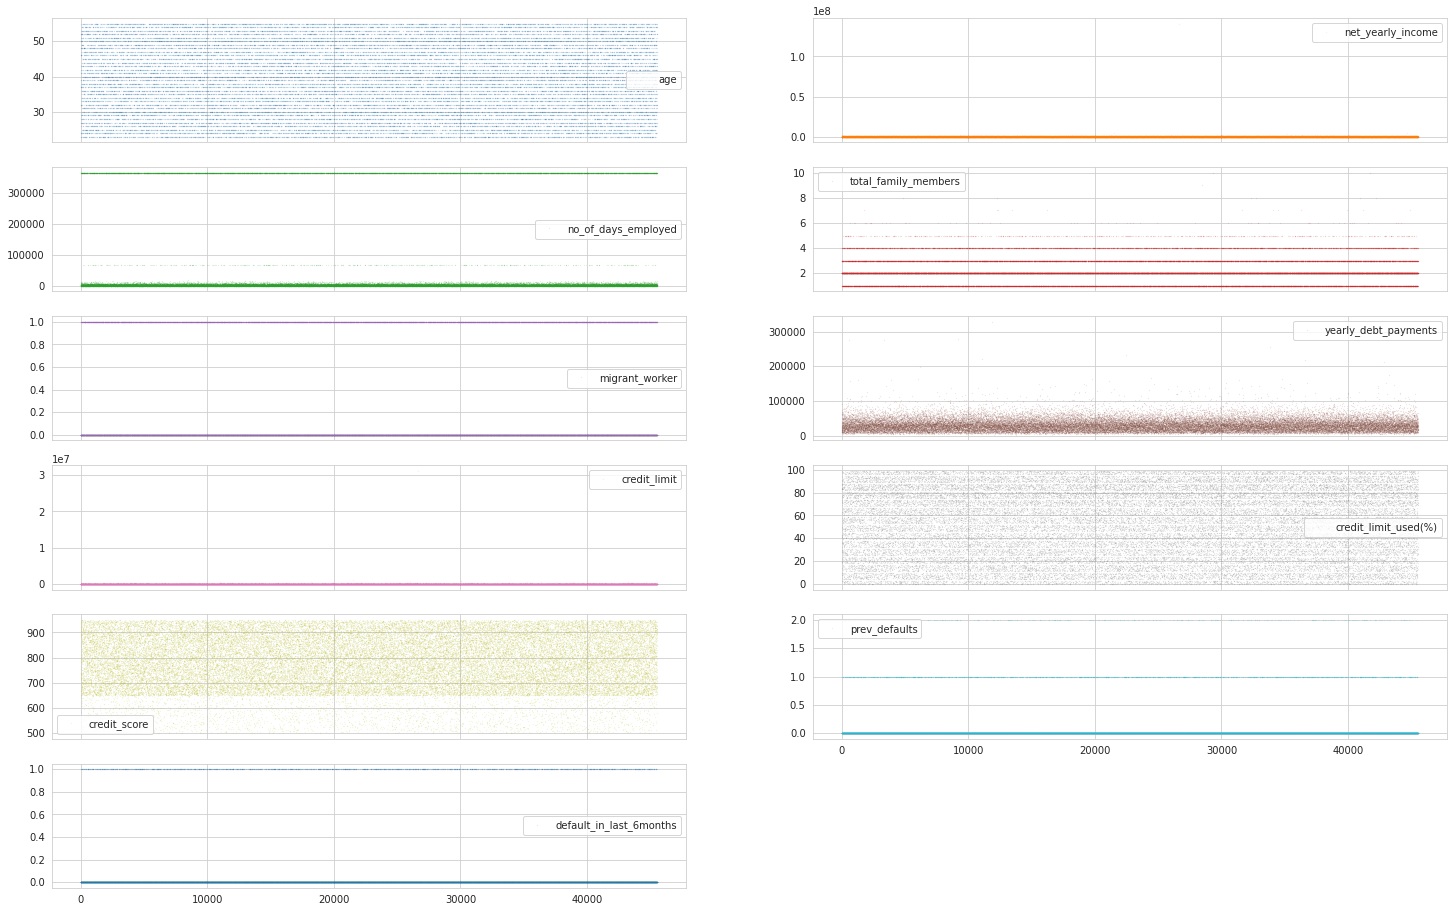

In [ ]:
X.plot(lw=0, marker=".", subplots=True, layout=(-1, 2), markersize=0.1,
figsize=(25, 16));

## Analyze Continuous Features

In [ ]:
# Creates mask to identify numerical features with more or less than 25 unique features
cols_continuous = df.select_dtypes(include="number").nunique() >= 25

CPU times: user 1min 11s, sys: 1.19 s, total: 1min 13s
Wall time: 1min 18s


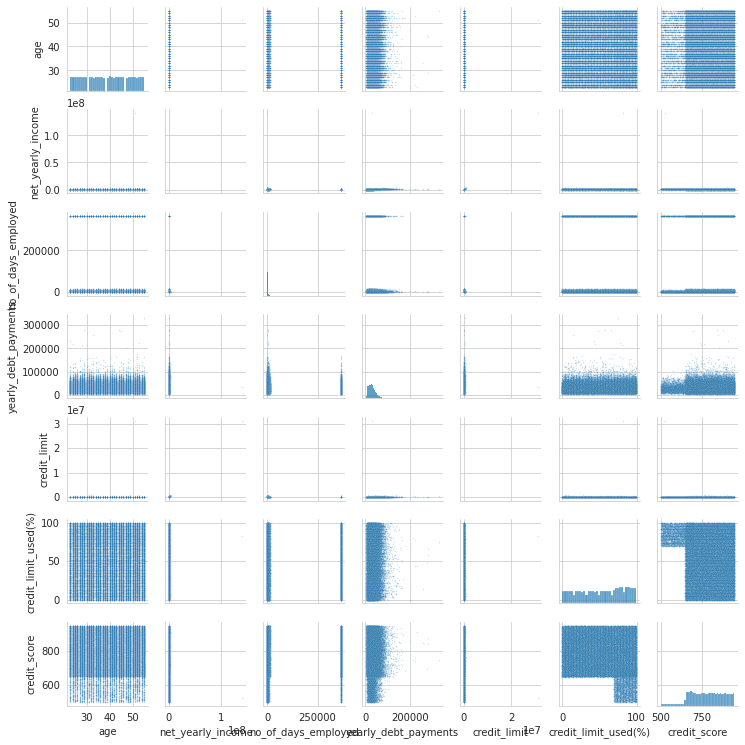

In [ ]:
# Analyze Continuous Features
%%time
# Create a new dataframe which only contains the continuous features
df_continuous = df[cols_continuous[cols_continuous].index]
df_continuous.shape
sns.pairplot(df_continuous, height=1.5, plot_kws={"s": 2, "alpha":0.2});

## Discrete and Ordinal Features

In [ ]:
# Discrete and Ordinal Features
# Create a new dataframe which doesn't contain the numerical continuous features
df_discrete = df[cols_continuous[~cols_continuous].index]
df_discrete.shape

(45528, 6)

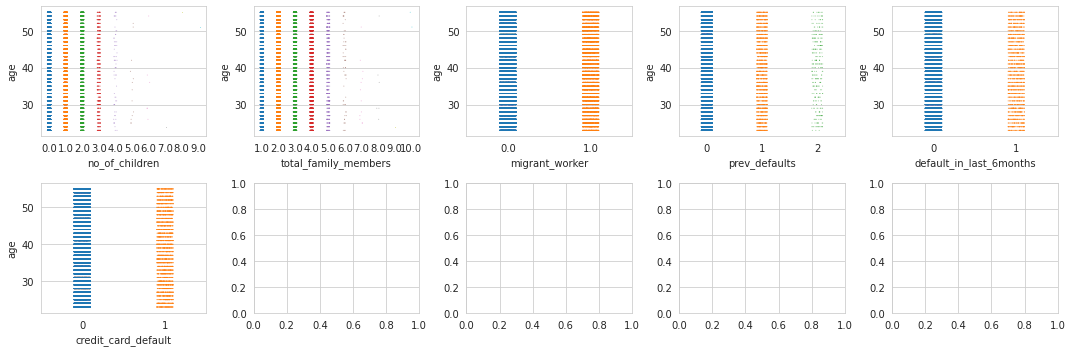

In [ ]:
# Establish number of columns and rows needed to plot all features
n_cols = 5
n_elements = len(df_discrete.columns)
n_rows = np.ceil(n_elements / n_cols).astype("int")
# Specify y_value to spread data (ideally a continuous feature)
y_value = df["age"]
# Create figure object with as many rows and columns as needed
fig, axes = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(15, n_rows * 2.5))
# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_discrete.columns, axes.ravel()):
  sns.stripplot(data=df, x=col, y=y_value, ax=ax, palette="tab10",size=1, alpha=0.5)
  plt.tight_layout();

### Thoughts:
- credit limit used % and credit score both do not seem to be normally distributed.
- net yearly income and credit limit are HIGHLY correlated.  One will have to be removed in feature selection.
- the last two columns, previous defaults and default in last 6 months are obviously the most highly correlated with our outcome variable
- as credit limit used % goes up you are more likely to default, and credit score go up you are less likely to default.  These correlations are decently strong... around .3/.4
- we also see that theres a negative correlation between number of family members and numbers of days at job.


# (5.) Outliers

In [ ]:
X.isnull().sum()

gender                     0
owns_car                   0
owns_house                 0
occupation_type            0
age                        0
net_yearly_income          0
no_of_days_employed        0
total_family_members       0
migrant_worker             0
yearly_debt_payments       0
credit_limit               0
credit_limit_used(%)       0
credit_score               0
prev_defaults              0
default_in_last_6months    0
dtype: int64

In [ ]:
# Split the data into numeric and categorical lists and dataframes
numerics = ['int16','int32','int64','float64']
catDF = X.select_dtypes(exclude=numerics)
numDF = X.select_dtypes(include=numerics)
catDF.head()

,gender,owns_car,owns_house,occupation_type
0,F,N,Y,Unknown
1,M,N,Y,Laborers
2,M,N,Y,Laborers
3,F,N,Y,Core staff
4,M,Y,Y,Core staff


In [ ]:
numDF.head()

,age,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
0,46,107934.04,612,1,1,33070.28,18690.93,73,544.0,2,1
1,29,109862.62,2771,2,0,15329.53,37745.19,52,857.0,0,0
2,37,230153.17,204,2,0,48416.60,41598.36,43,650.0,0,0
3,39,122325.82,11941,2,0,22574.36,32627.76,20,754.0,0,0
4,46,387286.00,1459,1,0,38282.95,52950.64,75,927.0,0,0


In [ ]:
catDF['migrant_worker']=numDF['migrant_worker']
numDF.drop('migrant_worker',axis=1,inplace=True)
save_for_later=numDF[['prev_defaults', 'default_in_last_6months']].copy()
numDF = numDF.drop(columns=['prev_defaults', 'default_in_last_6months'])

<ipython-input-158-3c21d8f7ed98>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catDF['migrant_worker']=numDF['migrant_worker']
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
for column in numDF:  
  print(df[column].describe())
  q1 = df[column].quantile(.25)
  q3 = df[column].quantile(.75)
  IQR = q3-q1
  lower_lim = q1 - 1.5 * IQR
  upper_lim = q3 +1.5 * IQR
  print(column)
  print(lower_lim)
  print(upper_lim)

count    45528.000000
mean        38.993411
std          9.543990
min         23.000000
25%         31.000000
50%         39.000000
75%         47.000000
max         55.000000
Name: age, dtype: float64
age
7.0
71.0
count    4.552800e+04
mean     2.006556e+05
std      6.690740e+05
min      2.717061e+04
25%      1.263458e+05
50%      1.717149e+05
75%      2.406038e+05
max      1.407590e+08
Name: net_yearly_income, dtype: float64
net_yearly_income
-45041.052500000005
411990.6475
count     45065.000000
mean      67609.289293
std      139323.524434
min           2.000000
25%         936.000000
50%        2224.000000
75%        5817.000000
max      365252.000000
Name: no_of_days_employed, dtype: float64
no_of_days_employed
-6385.5
13138.5
count    45445.000000
mean         2.158081
std          0.911572
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: total_family_members, dtype: float64
total_family_members
0.5
4.5
count    

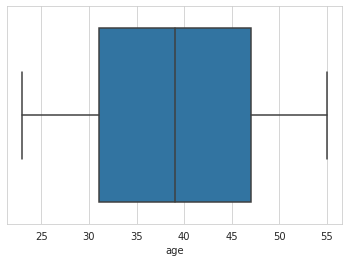

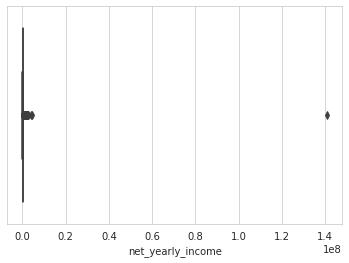

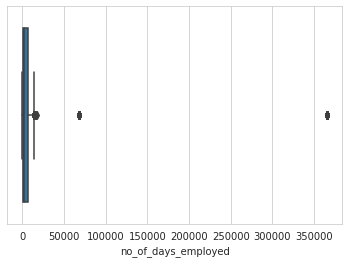

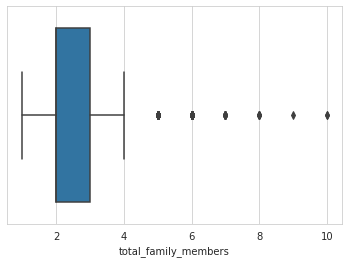

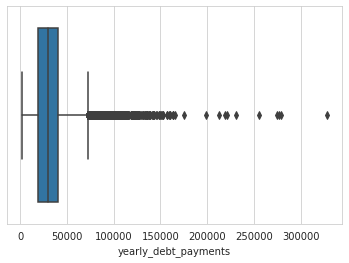

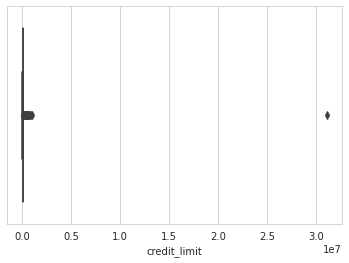

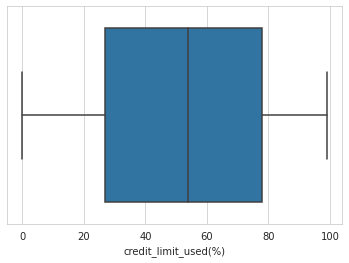

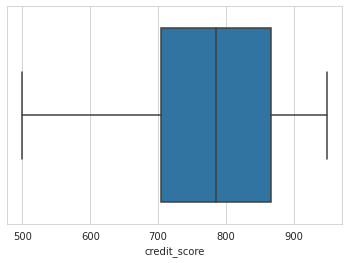

In [ ]:
for column in numDF:
  sns.boxplot(x=numDF[column])
  plt.show()

## Winsorizing

In [ ]:
from scipy.stats.mstats import winsorize

In [ ]:
# had some issues fixing this in the loop so I had to do individually with a lower threshold
numDF['no_of_days_employed'] = winsorize(numDF['no_of_days_employed'], (0.15, 0.2))


In [ ]:
# for some reason, when I did this in the loop it was elimiating families with 4 members down to three, so I did that here
numDF['total_family_members']=winsorize(numDF['total_family_members'], (0.05, 0.05))

In [ ]:
# holding these columns to add back in later.
save_for_later['total_family_members']=numDF['total_family_members']

In [ ]:
save_for_later.head()

,prev_defaults,default_in_last_6months,total_family_members
0,2,1,1
1,0,0,2
2,0,0,2
3,0,0,2
4,0,0,1


In [ ]:
numDF.drop('total_family_members',axis=1,inplace=True)

In [ ]:
# winsorizing in a loop
for column in numDF:
  numDF[column] = winsorize(numDF[column], (0.1, 0.1))

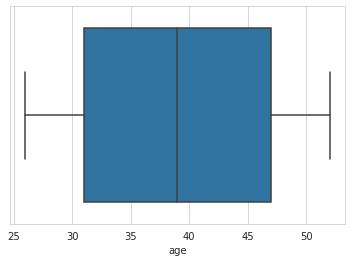

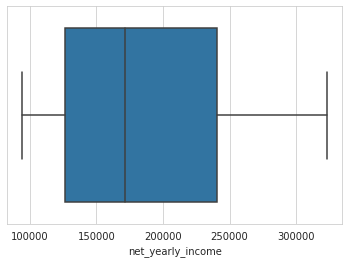

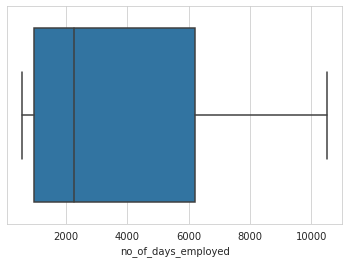

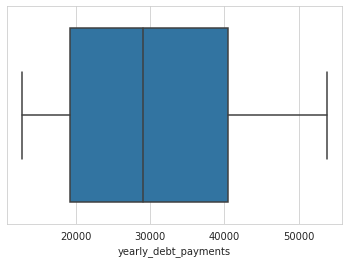

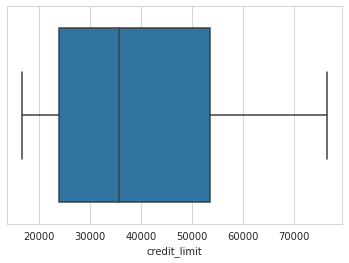

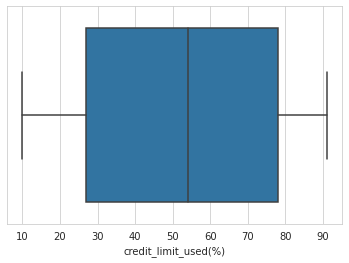

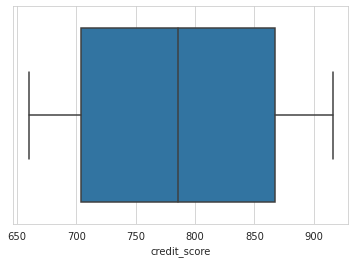

In [ ]:
# checking results
for column in numDF:
  sns.boxplot(x=numDF[column])
  plt.show()

In [ ]:
numDF = numDF.merge(save_for_later, how='outer', left_index=True, right_index=True)


In [ ]:
numDF.head()

,age,net_yearly_income,no_of_days_employed,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,total_family_members
0,46,107934.04,612,33070.28,18690.93,73,660.0,2,1,1
1,29,109862.62,2771,15329.53,37745.19,52,857.0,0,0,2
2,37,230153.17,573,48416.60,41598.36,43,660.0,0,0,2
3,39,122325.82,10510,22574.36,32627.76,20,754.0,0,0,2
4,46,322951.77,1459,38282.95,52950.64,75,916.0,0,0,1


### Thoughts:
The main column that had EXTREME outliers was no of days employed.  It had an insane outlier of around 300k days... for some reason I could not get this to be removed with winsorization, just .1 like I did for everything else.  Also had an issue with winsorizing the number of family members, so I had to adjust that.

I was hoping looking at the outliers/box plot for credit limit and net yearly income might give me some insight on what column to drop, but they look nearly identical.

I should have left the code, but some of the values that I thought logarithmic transformation would work better for, still ended up with a lot of outliers, so I ditched this approach and winsorized.  Like I said, I should have left the code though.

# (.6) EDA

## Univariate Analysis

In [ ]:
# getting my X values back together
X = pd.concat([catDF, numDF],axis=1)

In [ ]:
# adding y to catDF in order to visualize data easier
catDF=pd.concat([catDF,y],axis=1)

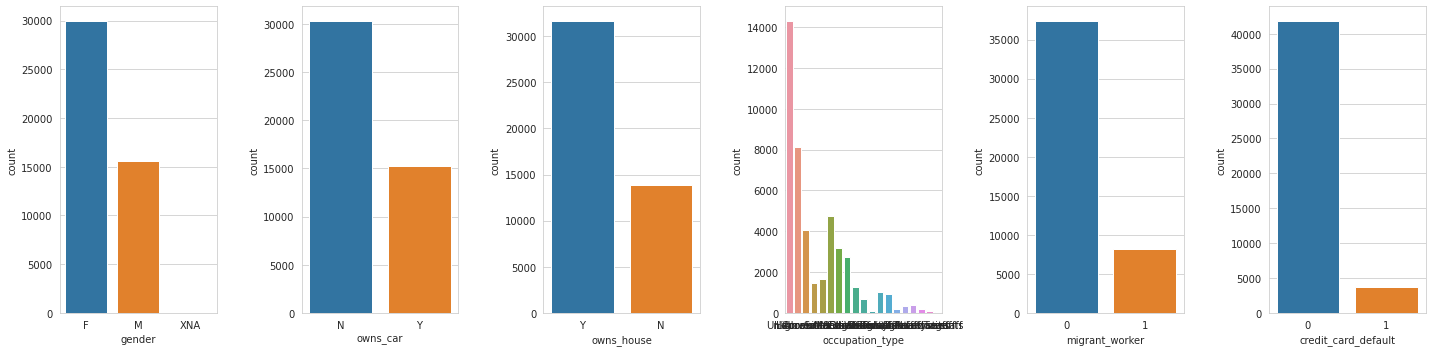

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=len(catDF.columns), figsize=(20,5))
for idx, column in enumerate(catDF.columns):
    sns.countplot(x=column, data=catDF, ax=axs[idx])
    
plt.tight_layout()
plt.show()

In [ ]:
catDF.credit_card_default.value_counts()

0    41831
1     3697
Name: credit_card_default, dtype: int64

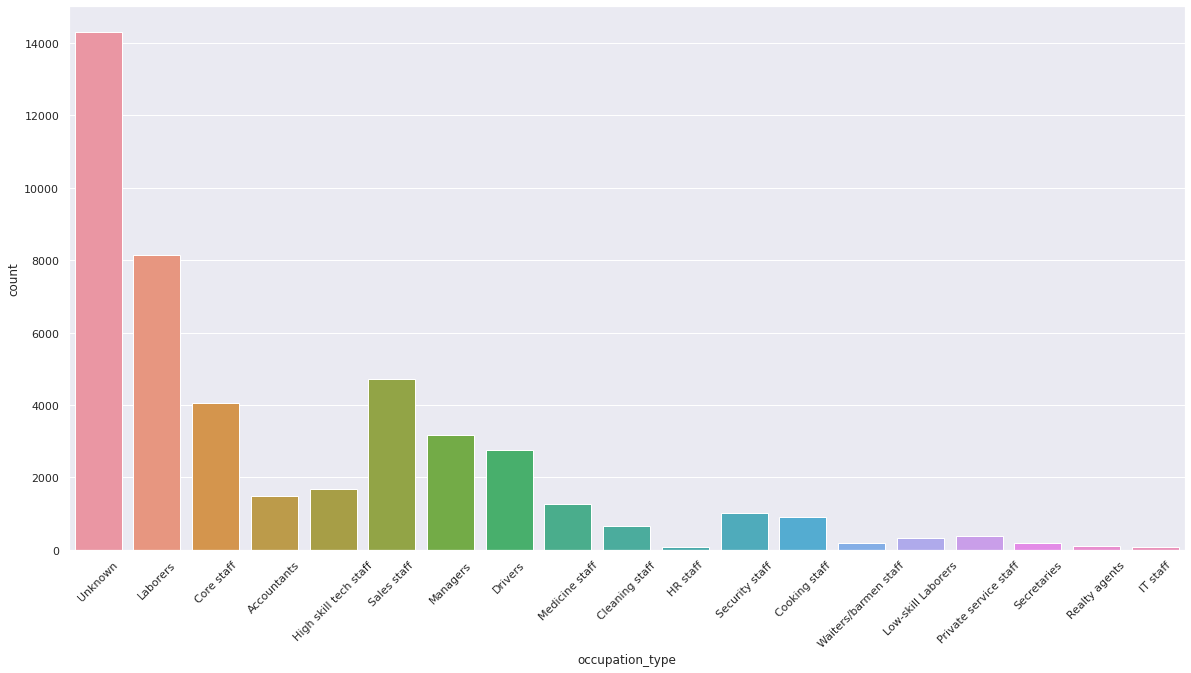

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(x="occupation_type", data=catDF)
plt.xticks(rotation=45)

plt.show()

In [ ]:
catDF.occupation_type.value_counts(normalize=True)

Unknown                  0.314070
Laborers                 0.178659
Sales staff              0.103782
Core staff               0.089220
Managers                 0.069584
Drivers                  0.060336
High skill tech staff    0.036944
Accountants              0.032376
Medicine staff           0.028005
Security staff           0.022514
Cooking staff            0.019812
Cleaning staff           0.014606
Private service staff    0.008500
Low-skill Laborers       0.007380
Waiters/barmen staff     0.004459
Secretaries              0.004371
Realty agents            0.002218
HR staff                 0.001713
IT staff                 0.001450
Name: occupation_type, dtype: float64

### Thoughts:
1. First we are dealing with a highly imbalanced dataset. only ~3.7k out of ~45k default
2. Most of the records are women, who don't own a car but do own a house.
3. It will be interesting to see what we find out from feature importance, because in terms of job, the majority of our records are unknown (31.4%)... we might need to go back later and drop this.

## Bivariate Analysis

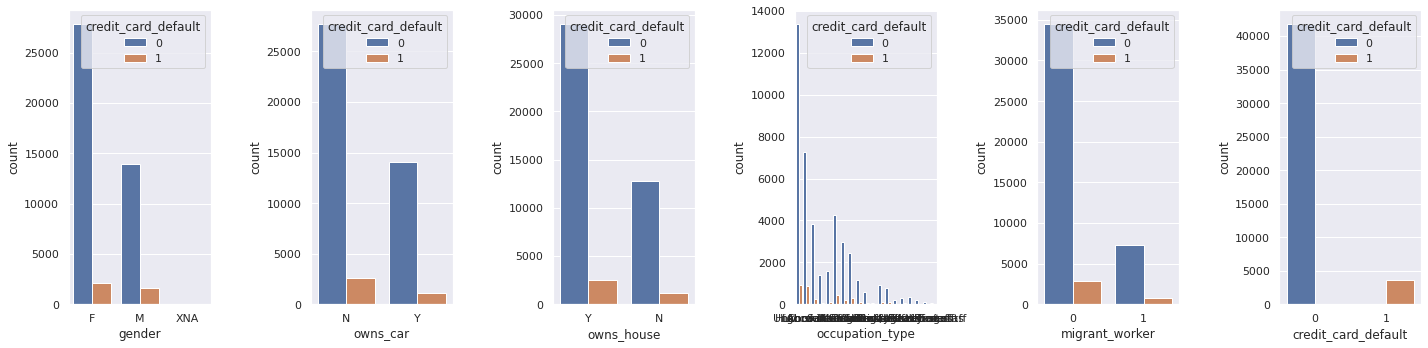

In [ ]:

fig, axs = plt.subplots(nrows=1, ncols=len(catDF.columns), figsize=(20,5))

for idx, column in enumerate(catDF.columns):
    sns.set(rc={'figure.figsize':(15,10)})
    edu = sns.countplot(x=column, hue='credit_card_default', data=catDF, ax=axs[idx])
    
plt.tight_layout()
plt.show()

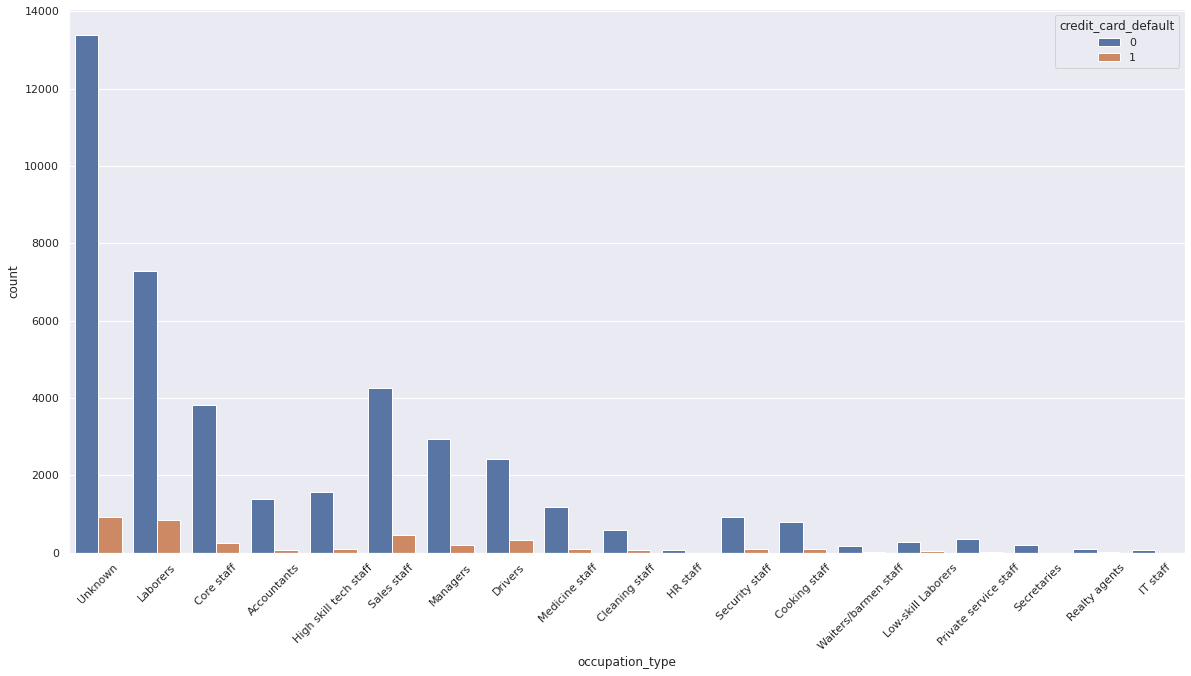

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(x="occupation_type", hue='credit_card_default',data=catDF)
plt.xticks(rotation=45)

plt.show()

In [ ]:
pd.crosstab(catDF.occupation_type,catDF.credit_card_default,normalize='index',margins=True)

credit_card_default,0,1
occupation_type,,
Accountants,0.947083,0.052917
Cleaning staff,0.896241,0.103759
Cooking staff,0.885809,0.114191
Core staff,0.940177,0.059823
Drivers,0.883145,0.116855
HR staff,0.910256,0.089744
High skill tech staff,0.936385,0.063615
IT staff,0.969697,0.030303
Laborers,0.895377,0.104623


In [ ]:
result = pd.crosstab(catDF.occupation_type, catDF.credit_card_default, normalize='index', margins=True)
result_sorted = result.sort_values(by=1, ascending=False)
result_rounded = result_sorted.round(3)

print(result_rounded)


credit_card_default        0      1
occupation_type                    
Low-skill Laborers     0.842  0.158
Drivers                0.883  0.117
Cooking staff          0.886  0.114
Laborers               0.895  0.105
Cleaning staff         0.896  0.104
Waiters/barmen staff   0.897  0.103
Security staff         0.897  0.103
Realty agents          0.901  0.099
Sales staff            0.903  0.097
HR staff               0.910  0.090
All                    0.919  0.081
Medicine staff         0.922  0.078
Private service staff  0.925  0.075
Managers               0.932  0.068
Unknown                0.936  0.064
High skill tech staff  0.936  0.064
Core staff             0.940  0.060
Accountants            0.947  0.053
Secretaries            0.960  0.040
IT staff               0.970  0.030


In [ ]:
for column in catDF.columns:
    result = pd.crosstab(catDF[column], catDF.credit_card_default, normalize='index', margins=True)
    
    result_rounded = result.round(3)

    print(f"\nColumn: {column}\n{result_rounded}")


Column: gender
credit_card_default      0      1
gender                           
F                    0.930  0.070
M                    0.897  0.103
XNA                  1.000  0.000
All                  0.919  0.081

Column: owns_car
credit_card_default      0      1
owns_car                         
N                    0.915  0.085
Y                    0.925  0.075
All                  0.919  0.081

Column: owns_house
credit_card_default      0      1
owns_house                       
N                    0.918  0.082
Y                    0.919  0.081
All                  0.919  0.081

Column: occupation_type
credit_card_default        0      1
occupation_type                    
Accountants            0.947  0.053
Cleaning staff         0.896  0.104
Cooking staff          0.886  0.114
Core staff             0.940  0.060
Drivers                0.883  0.117
HR staff               0.910  0.090
High skill tech staff  0.936  0.064
IT staff               0.970  0.030
Laborers         

In [ ]:
# quick check into occupation type and migrant worker
pd.crosstab(catDF.occupation_type, catDF.migrant_worker, margins=True)

migrant_worker,0,1,All
occupation_type,,,
Accountants,1234,240,1474
Cleaning staff,554,111,665
Cooking staff,718,184,902
Core staff,3340,722,4062
Drivers,1970,777,2747
HR staff,66,12,78
High skill tech staff,1343,339,1682
IT staff,53,13,66
Laborers,5956,2178,8134


### Thoughts:
- men are more likely to default
- owning a house seems to have no impact on defaulting
- I thought migrant workers might have been a break away column or subset of occupation.  But it seems to be its own category.  I was hoping that migrant workers would take up a lot of the unknown occupation values, but that is not the case.
- low skilled laborers are most likely occupation to default
- migrant workers and non car owners are slightly more likely to default

## Multivariate

<AxesSubplot:>

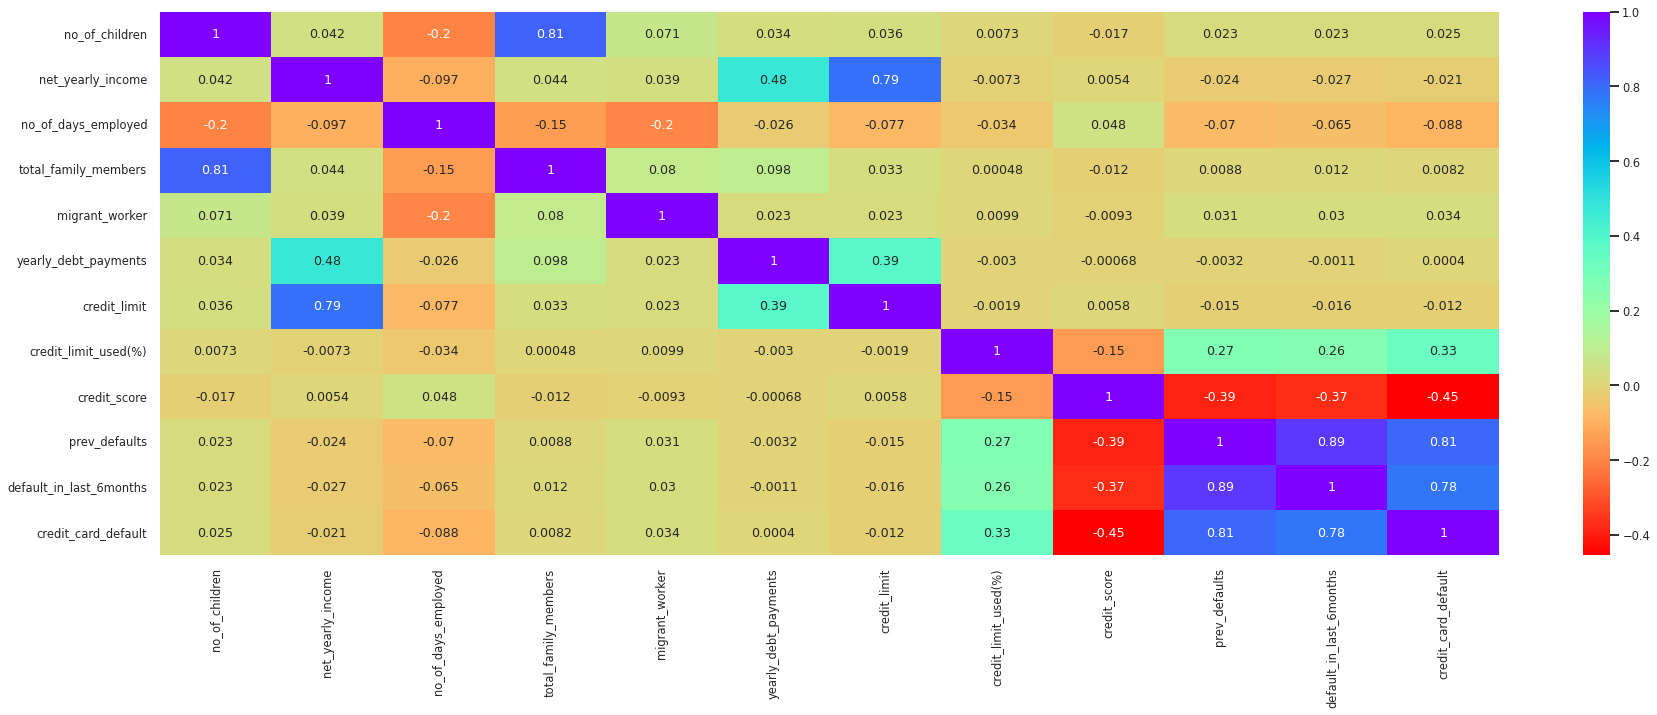

In [ ]:
sns.set(rc={'figure.figsize':(30,10)})
sns.set_context("talk", font_scale=0.7)
sns.heatmap(df.iloc[:,1:].corr(method='spearman'), cmap='rainbow_r', annot=True)

### Fixing Gender Issue

In [ ]:
# i'm eliminating the 1 row where the gender is XNA from both sets of data
X = X[X['gender'] != 'XNA']
y = y.loc[X.index]

In [ ]:
X['gender'].value_counts()

F    29957
M    15570
Name: gender, dtype: int64

In [ ]:
catDF.head()

,gender,owns_car,owns_house,occupation_type,migrant_worker,credit_card_default
0,F,N,Y,Unknown,1,1
1,M,N,Y,Laborers,0,0
2,M,N,Y,Laborers,0,0
3,F,N,Y,Core staff,0,0
4,M,Y,Y,Core staff,0,0


In [ ]:
catDF.columns

Index(['gender', 'owns_car', 'owns_house', 'occupation_type', 'migrant_worker',
       'credit_card_default'],
      dtype='object')

In [ ]:
catDF.dtypes


gender                 object
owns_car               object
owns_house             object
occupation_type        object
migrant_worker          int64
credit_card_default     int64
dtype: object

In [ ]:
catDF.credit_card_default.value_counts()

0    41831
1     3697
Name: credit_card_default, dtype: int64

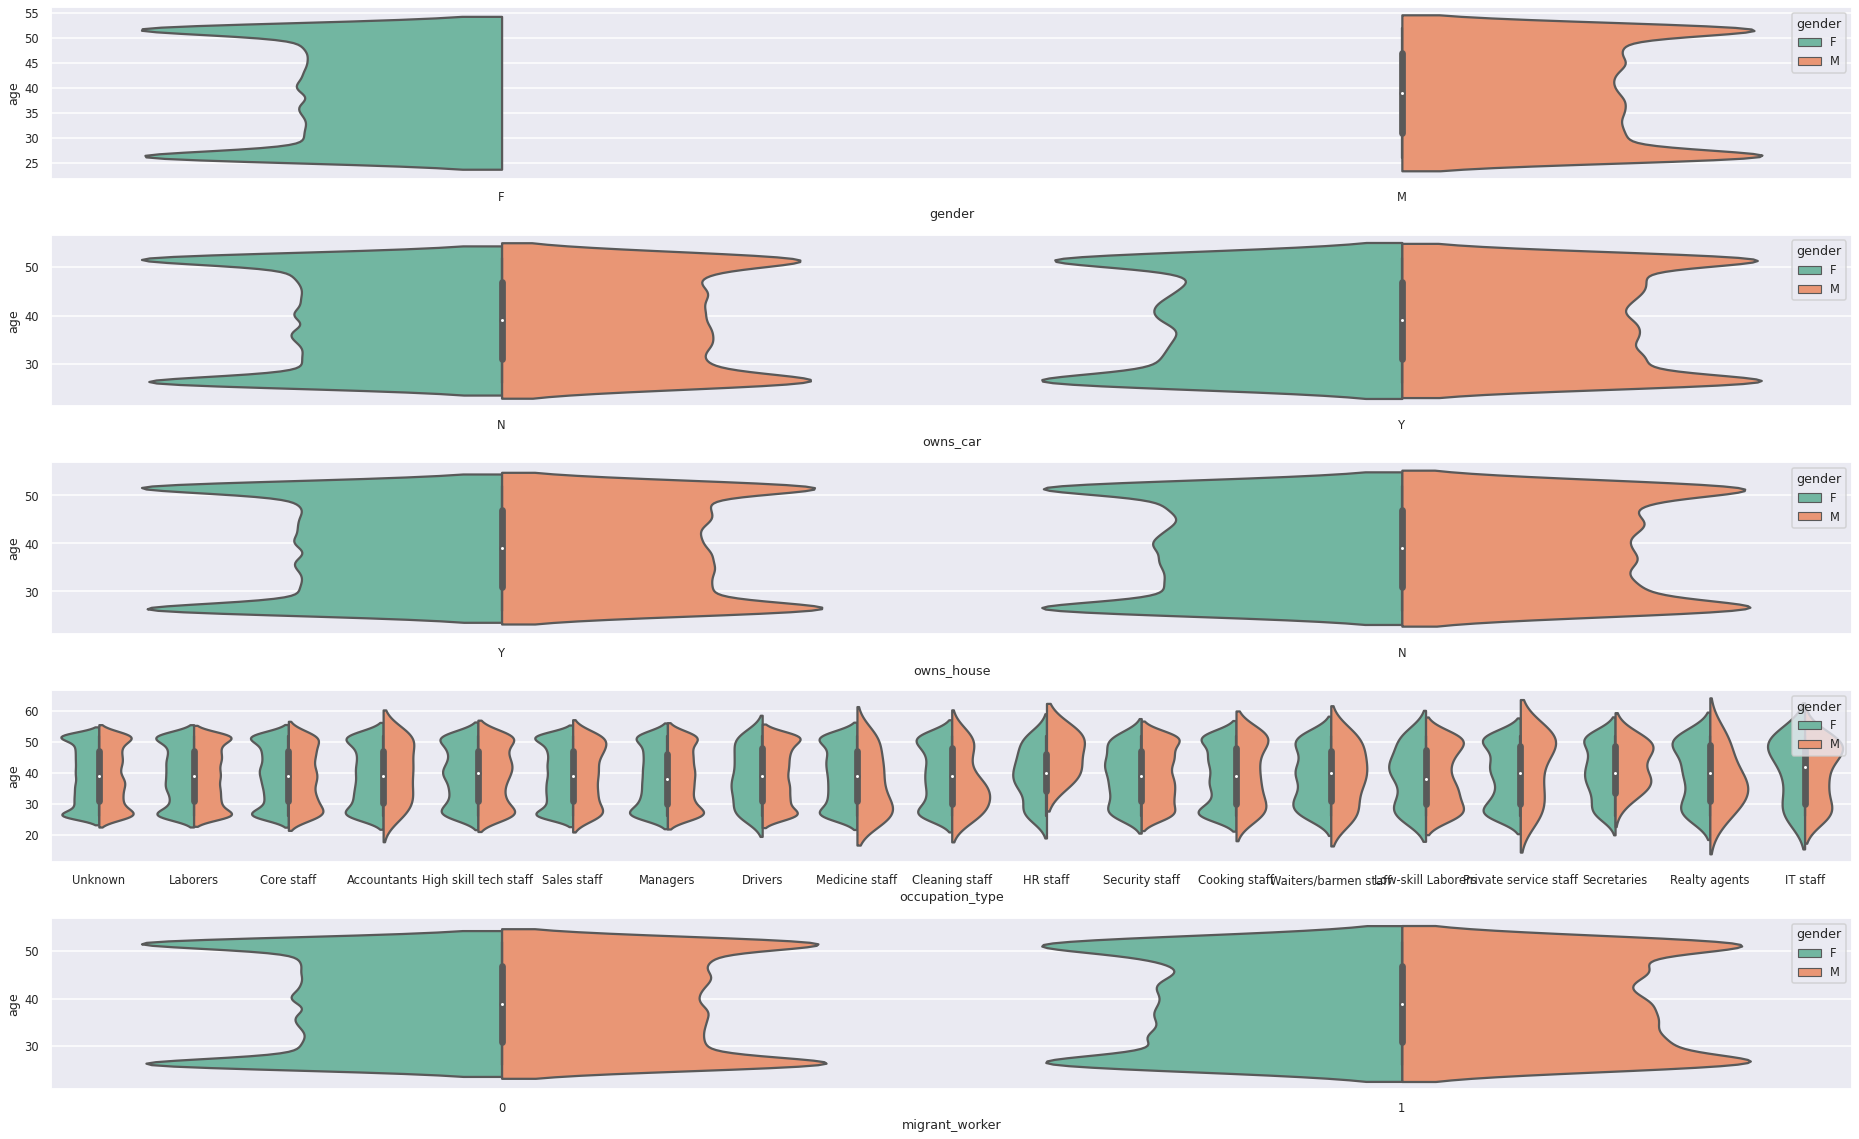

In [ ]:
selected_features = catDF.columns
# Create a figure with 5 subplots
fig, axes = plt.subplots(ncols=1, nrows=5, figsize=(26, 16))
# Loop through these features and plot entries from each feature against `Latitude`
for col, ax in zip(selected_features, axes.ravel()):
  sns.violinplot(data=X, x=col, y=X["age"],palette="Set2",split=True,hue="gender", ax=ax)
  plt.tight_layout()

# for some reason, i cannot get the violin plot to work with credit_card_default

In [ ]:
# sns.swarmplot(data=X, x=col, y=X["age"], palette="Set2", hue="gender", ax=ax)

KeyboardInterrupt: ignored

### Thoughts:
- most of the correlation thoughts were expressed above in section 2
- some interesting things from the violin plots, mostly when it comes to jobs though.  You can see men are able to start as accountants as an earlier age, whereas women start HR at a younger age than men.
- You also see a lot of lower skilled jobs have higher participation at younger ages and very old ages... whereas the higher skilled jobs tend to build early and mid and then tail off later

In [ ]:
df.columns

Index(['age', 'gender', 'owns_car', 'owns_house', 'no_of_children',
       'net_yearly_income', 'no_of_days_employed', 'occupation_type',
       'total_family_members', 'migrant_worker', 'yearly_debt_payments',
       'credit_limit', 'credit_limit_used(%)', 'credit_score', 'prev_defaults',
       'default_in_last_6months', 'credit_card_default'],
      dtype='object')

# (7.) Feature Selection (Part 1)
most of the feature selection has been done.
But we need to look into dropping occupation_type as well as we will drop either credit limit or net yearly income.

I think since credit info appears in a few other categories, we will drop credit limit.  We had to drop 1 do to their extremely high correlation.  Credit limit is essentially just measuring your net yearly income, so we do not want to count this twice.

In [ ]:
X.head()

,gender,owns_car,owns_house,occupation_type,migrant_worker,age,net_yearly_income,no_of_days_employed,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,total_family_members
0,F,N,Y,Unknown,1,46,107934.04,612,33070.28,18690.93,73,660.0,2,1,1
1,M,N,Y,Laborers,0,29,109862.62,2771,15329.53,37745.19,52,857.0,0,0,2
2,M,N,Y,Laborers,0,37,230153.17,573,48416.60,41598.36,43,660.0,0,0,2
3,F,N,Y,Core staff,0,39,122325.82,10510,22574.36,32627.76,20,754.0,0,0,2
4,M,Y,Y,Core staff,0,46,322951.77,1459,38282.95,52950.64,75,916.0,0,0,1


In [ ]:
X.shape

(45527, 15)

In [ ]:
y.shape

(45527,)

In [ ]:
X.drop(['credit_limit'], axis=1,inplace=True)

In [ ]:
X.shape

(45527, 14)

# (9.) Encoding Data

When deciding between get_dummies() and DictVectorizer(), consider the size of your dataset, the number of distinct values in your categorical variables, and whether you need to use scikit-learn for other tasks like model training. If you are working with a small dataset and using pandas, get_dummies() may be a convenient choice. If you are working with a large dataset and need to use scikit-learn, DictVectorizer() may be a more efficient choice.

So we are going to use the Dictionary Vectorizer

## Splitting X data into numeric and categorical

In [ ]:
X.shape

(45527, 14)

In [ ]:
catDF = X.select_dtypes(exclude=numerics)
numDF = X.select_dtypes(include=numerics)

In [ ]:
# saving a copy of X, before its vectorized
X_copy = pd.concat([catDF,numDF],axis=1)

In [ ]:
numDF.shape

(45527, 10)

## Using Dictionary Vectorizer

In [ ]:
from sklearn.feature_extraction import DictVectorizer

# Create a dictionary from catDF
cat_dict = catDF.to_dict('records')

# Create an instance of DictVectorizer and fit_transform on the dictionary
vectorizer = DictVectorizer(sparse=False)
cat_vector = vectorizer.fit_transform(cat_dict)

# Create a new dataframe from the vectorized categorical variables
catDF_vectorized = pd.DataFrame(cat_vector, columns=vectorizer.get_feature_names())


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
catDF_vectorized.head()

,gender=F,gender=M,occupation_type=Accountants,occupation_type=Cleaning staff,occupation_type=Cooking staff,occupation_type=Core staff,occupation_type=Drivers,occupation_type=HR staff,occupation_type=High skill tech staff,occupation_type=IT staff,...,occupation_type=Realty agents,occupation_type=Sales staff,occupation_type=Secretaries,occupation_type=Security staff,occupation_type=Unknown,occupation_type=Waiters/barmen staff,owns_car=N,owns_car=Y,owns_house=N,owns_house=Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
# making the new column names look better.  replacing = with _ and taking away CAPS
catDF_vectorized.columns = [col.replace('=', '_').lower() for col in catDF_vectorized.columns]


In [ ]:
catDF_vectorized.head()

,gender_f,gender_m,occupation_type_accountants,occupation_type_cleaning staff,occupation_type_cooking staff,occupation_type_core staff,occupation_type_drivers,occupation_type_hr staff,occupation_type_high skill tech staff,occupation_type_it staff,...,occupation_type_realty agents,occupation_type_sales staff,occupation_type_secretaries,occupation_type_security staff,occupation_type_unknown,occupation_type_waiters/barmen staff,owns_car_n,owns_car_y,owns_house_n,owns_house_y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
catDF_vectorized.shape

(45527, 25)

In [ ]:
numDF.shape

(45527, 10)

In [ ]:
catDF_vectorized = catDF_vectorized.reset_index(drop=True)
numDF = numDF.reset_index(drop=True)
X = pd.concat([catDF_vectorized, numDF], axis=1)

In [ ]:
X.shape

(45527, 35)

### Thoughts:
Basically, we decided between get dummies and dictionary vectorizer as these are the methods I know best.  We chose dictionary vectorizer because our dataset is somewhat larger.  We went from 14 features, to 35. So 21 new ones.

# (8.) Feature Importance

I felt like it made more sense to do feature importance after OHE.
When you perform feature importance, you are trying to determine which features are most important in predicting the outcome variable. If you perform feature importance before one-hot encoding, you will be treating categorical variables as numerical variables, which could result in incorrect feature importance scores. Therefore, it is recommended to perform one-hot encoding before feature importance to ensure that the feature importance scores reflect the importance of the individual categories within the categorical variable.

## Random Forest Method

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=22, stratify=y) # stratify based on the y column

In [ ]:
# First we build and train our Random Forest Model 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=5, random_state=42, n_estimators = 300).fit(X_train, y_train)
rf.feature_importances_
# create a new DataFrame with feature importances and column names
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})

# sort the features by importance
feature_importances = feature_importances.sort_values('importance', ascending=False)

# round the importance column to 5 decimal places
feature_importances['importance'] = feature_importances['importance'].round(5)

# print the feature importances
print(feature_importances)

                                  feature  importance
32                          prev_defaults     0.36575
31                           credit_score     0.26694
33                default_in_last_6months     0.26490
30                   credit_limit_used(%)     0.08841
28                    no_of_days_employed     0.00534
1                                gender_m     0.00134
0                                gender_f     0.00115
29                   yearly_debt_payments     0.00109
27                      net_yearly_income     0.00105
10               occupation_type_laborers     0.00059
19                occupation_type_unknown     0.00053
26                                    age     0.00038
34                   total_family_members     0.00032
21                             owns_car_n     0.00028
22                             owns_car_y     0.00028
6                 occupation_type_drivers     0.00026
25                         migrant_worker     0.00025
5              occupation_ty

### Quick thoughts:
Occupation looking not all that important....
also owning as house as suspected, not that important


## Permutation Importance Method

In [ ]:
from sklearn.inspection import permutation_importance
r = permutation_importance(rf, X_test, y_test,
                           n_repeats=10,
                           random_state=0)
perm = pd.DataFrame(columns=['AVG_Importance'], index=[i for i in X_train.columns])
perm['AVG_Importance'] = r.importances_mean

In [ ]:
perm['AVG_Importance'] = round(perm['AVG_Importance'], 6)
print(perm.to_string())

                                       AVG_Importance
gender_f                                      0.00000
gender_m                                      0.00000
occupation_type_accountants                   0.00000
occupation_type_cleaning staff                0.00000
occupation_type_cooking staff                 0.00000
occupation_type_core staff                    0.00000
occupation_type_drivers                       0.00000
occupation_type_hr staff                      0.00000
occupation_type_high skill tech staff         0.00000
occupation_type_it staff                      0.00000
occupation_type_laborers                      0.00000
occupation_type_low-skill laborers            0.00000
occupation_type_managers                      0.00000
occupation_type_medicine staff                0.00000
occupation_type_private service staff         0.00000
occupation_type_realty agents                 0.00000
occupation_type_sales staff                   0.00000
occupation_type_secretaries 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(X,y)

KNeighborsClassifier()

In [ ]:
results = permutation_importance(kn, X_test, y_test, n_repeats=10, random_state=0)

KeyboardInterrupt: ignored

In [ ]:
from matplotlib import pyplot

# get importance
importance = feature_importances['importance']
importance = results.importances_mean
importance = np.sort(importance)

# get feature names
feature_names = feature_importances['feature']

# summarize feature importance
for i, v in enumerate(importance):
    print('Feature: {} - Name: {} - Score: {}'.format(i, feature_names[i], v))

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.xticks(range(len(importance)), feature_names, rotation=90)
pyplot.show()

### Quick Thoughts:
once again occupation not that important...
Also this says gender and owning a car/house not imporant

## Linear Regression Coefficients Method

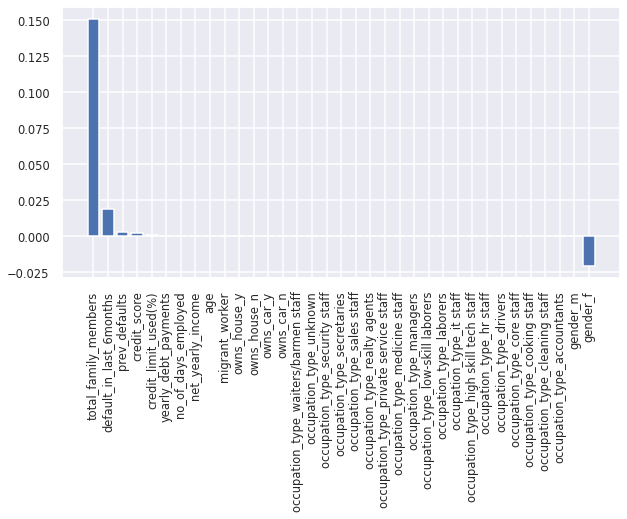

In [ ]:
# Coefficients
model = LogisticRegression(max_iter=1000)
model.fit(X,y)
importance = model.coef_[0]
importance = np.sort(importance)
importance
importance = pd.DataFrame({'feature': X.columns, 'importance': importance})
importance = importance.sort_values('importance', ascending=False)

# create a chart of feature importances
plt.figure(figsize=(10,5))
plt.bar(importance['feature'], importance['importance'])
plt.xticks(rotation=90)
plt.show()

### Thoughts: Feature Importance
So, the through line with all 3 methods seems to be that owning a house, and most occupations do not matter.

I'm going to use Random Forest method as my basis.
5              occupation_type_core staff     0.00022
4           occupation_type_cooking staff     0.00012
is a nice jump. So we will eliminate all those from cooking_staff and before.

# (7.) Feature Selection (Part 2.)

So we are going to eliminate the least useful occupation features, as well as owning a house.

In [ ]:
X.shape

(45527, 35)

In [ ]:
# number of bottom columns to drop
n = 17

# extract the column names of the bottom n features
bottom_features = feature_importances.tail(n)['feature'].tolist()
bottom_features
# drop the bottom n features from X
X = X.drop(bottom_features, axis=1)

In [ ]:
X.shape

(45527, 18)

In [ ]:
X.head()

,gender_f,gender_m,occupation_type_core staff,occupation_type_drivers,occupation_type_laborers,occupation_type_unknown,owns_car_n,owns_car_y,migrant_worker,age,net_yearly_income,no_of_days_employed,yearly_debt_payments,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,total_family_members
0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1,46,107934.04,612,33070.28,73,660.0,2,1,1
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0,29,109862.62,2771,15329.53,52,857.0,0,0,2
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0,37,230153.17,573,48416.60,43,660.0,0,0,2
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,39,122325.82,10510,22574.36,20,754.0,0,0,2
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0,46,322951.77,1459,38282.95,75,916.0,0,0,1


## Thoughts:
So we basically eliminated just under half of our features.  17 eliminated out of 35.  18 LEFT

# (10.) Scaling

 - Min max scaler is better for unevenly distributed data
 - Standardscaler is better for normalized data
 - RobustScaler: This method is useful when the dataset has outliers that can affect the mean and standard deviation. similar to standard scaler.
 - Max absolute scaler - from -1 to 1, better with data that has negative quantities

 So earlier, I noticed some of the values were not as evenly distributed as I would like.  I think it will be best to use the min max scaler.

In [ ]:
# scale the data
from sklearn import preprocessing
minmaxScaler = preprocessing.MinMaxScaler()

In [ ]:
X_tran = pd.DataFrame(minmaxScaler.fit_transform(X))
X_tran.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.769231,0.058473,0.003925,0.493821,0.777778,0.000000,1.0,1.0,0.000000
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.115385,0.066918,0.221194,0.060709,0.518519,0.769531,0.0,0.0,0.333333
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.423077,0.593650,0.000000,0.868477,0.407407,0.000000,0.0,0.0,0.333333
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.500000,0.121492,1.000000,0.237580,0.123457,0.367188,0.0,0.0,0.333333
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.769231,1.000000,0.089162,0.621080,0.802469,1.000000,0.0,0.0,0.000000


In [ ]:
# (10.) One More Time Through Algorithm Harness

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_tran, y, test_size=0.2, random_state=22, stratify=y)

LR: 0.976827 (0.002037)
Score for each of the 10 K-fold tests:  [0.97831458 0.97803405 0.97364086 0.97281713 0.97830862 0.97721032
 0.97721032 0.97940692 0.97775947 0.97556288]
LogisticRegression(solver='liblinear')
	Training time: 0.179s
	Prediction time: 2.483s

LDA: 0.976607 (0.001596)
Score for each of the 10 K-fold tests:  [0.97831458 0.97583745 0.97473915 0.97473915 0.97803405 0.97693575
 0.9763866  0.97940692 0.97721032 0.97446458]
LinearDiscriminantAnalysis()
	Training time: 0.220s
	Prediction time: 2.225s

KNN: 0.971335 (0.001374)
Score for each of the 10 K-fold tests:  [0.9717266  0.97089511 0.97034596 0.97007139 0.97171884 0.97254256
 0.97199341 0.97419001 0.97089511 0.96897309]
KNeighborsClassifier()
	Training time: 0.014s
	Prediction time: 29.095s

CART: 0.970292 (0.002480)
Score for each of the 10 K-fold tests:  [0.9714521  0.97007139 0.96952224 0.96650192 0.96705107 0.96924767
 0.97501373 0.97034596 0.97007139 0.97364086]
DecisionTreeClassifier()
	Training time: 0.120s
	

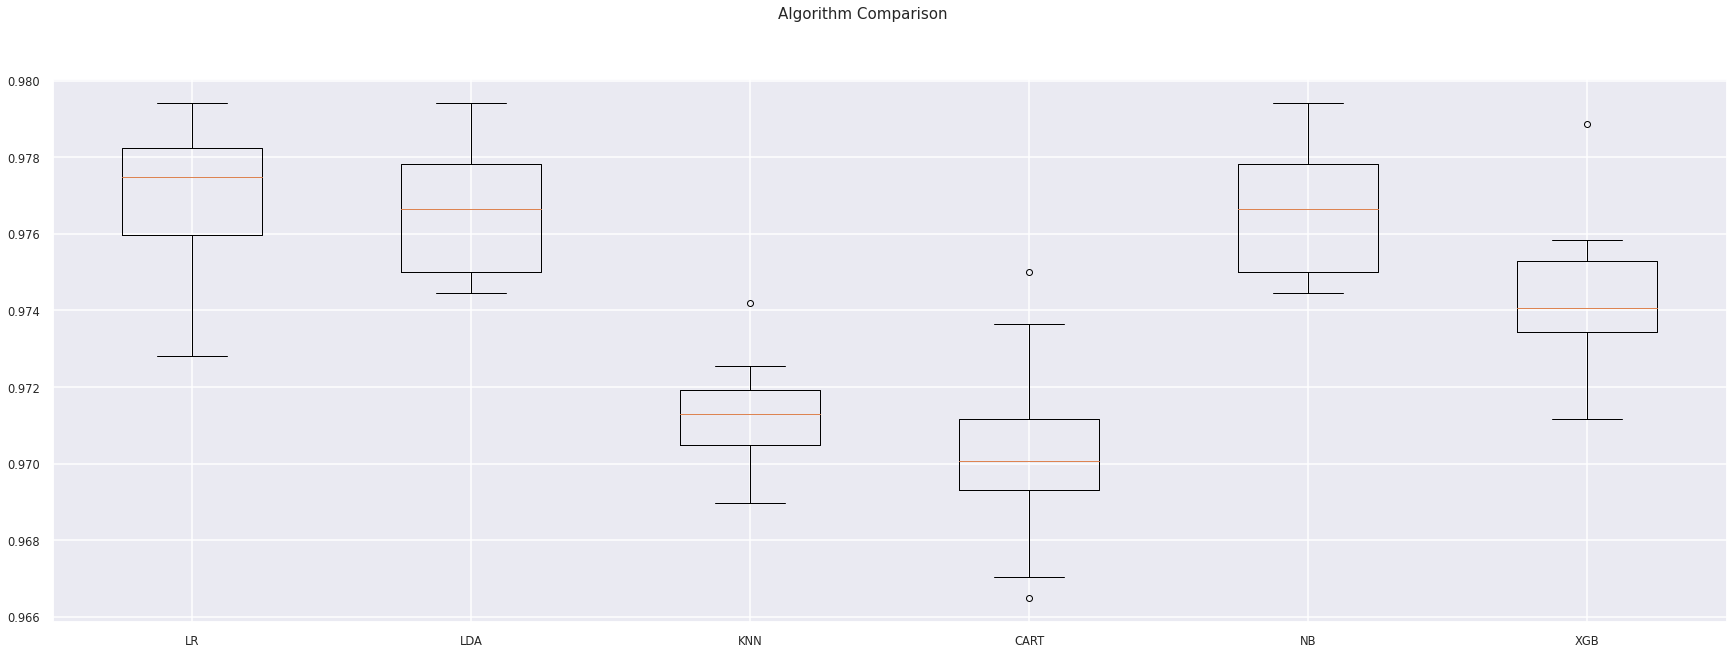

In [ ]:
# Compare Algorithms
from sklearn.metrics import roc_auc_score
from time import time
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('XGB', XGBClassifier()))
# models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    start = time()
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    model.fit(X_train, y_train)
    train_time = time() - start
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    predict_time = time()-start 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    #y_pred = model.predict_proba(X_train)[:, 1]
    #auc = roc_auc_score(y_train, y_pred)
    print(msg)
    print("Score for each of the 10 K-fold tests: ",cv_results)
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    #y_pred = model.predict(X_test)
    #print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print()
    
    
    
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## LDA look again

In [ ]:
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)


array([[8285,   82],
       [ 162,  577]])

In [ ]:
print (classification_report (y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      8367
           1       0.88      0.78      0.83       739

    accuracy                           0.97      9106
   macro avg       0.93      0.89      0.91      9106
weighted avg       0.97      0.97      0.97      9106



# Final Thoughts:

So, if you look of all the models we ran through the harness, they all got more accurate, aside from XGBoost and Decision Tree.  But those only went down slightly. 

- Models before Wrangling
-- LR: 95.4
-- LDA: 97.65
-- KNN: 91.37
-- CART: 97.37
-- NB: 91.87 
-- XGB: 97.83

- Post Wrangling
-- LR: 97.68
-- LDA: 97.66
-- KNN: 97.13
-- CART: 97.03
-- NB: 97.66
-- XGB: 97.44

Also for LDA, which we looked at more closely, the accuracy overall slightly improved but the recall of the Yes class went from 69% to 78% while the f1 score actually went up from .82 to .83 for Yes and stayed at .99 for No. So we didn't sacrifice to get this increased recall.

This is without tuning or dealing with the imbalance in our dataset (via under or over sampling.

We were able to eliminate started with 18 features.  We were able to eliminate a few right off the bat due to unimportance as well as multicolinearity.  Then our dataset grew to 35 features as a result of encoding our categorical variables.  From feature importance we trimmed that back down to 18 features, Right back where we started from.  So with the same amount of features that the dataset originally had we are able to pretty much improve accuracy across the board using our rangling techniques.

# Future Work:

1. Employing Under or Over sampling to deal with the fact that our dataset is heavily imbalanced.  In my past work using smote/msmote etc has resulted in the biggest gains for model improvement.  Considering how accurate our model already is, it would be interesting to see how much more it would improve from just that process.
2. Tuning then either for accuracy or more likely for recall of the yes class would also help.  Most likely I would chose to tune the hyper parameters for XGBoost as the seems like the most accurate model.  We should be able to potentially squeeze out a bit more if we tune the hyperparameters as well.